## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from datetime import datetime
import pytz
import json
import math

## Getting the data ready to be analyzed

In [2]:
spanish_wikibreaks_df = pd.read_json('../../wikidump/wikibreaks_refactored/eswiki_20210201_refactored_wikibreaks_dataset.json.gz', compression='gzip', lines=True)
# spanish_wikibreaks_df.head()

Number of rows and columns

In [3]:
spanish_wikibreaks_df.shape

(2151, 5)

Basic info about the Pandas dataframe

In [4]:
spanish_wikibreaks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_user_page  1632 non-null   float64
 1   wikibreaks    2151 non-null   object 
 2   ambiguous     2151 non-null   bool   
 3   name          2151 non-null   object 
 4   id_talk_page  892 non-null    float64
dtypes: bool(1), float64(2), object(2)
memory usage: 69.4+ KB


Basic stats

In [5]:
spanish_wikibreaks_df.describe()

id_user_page  id_talk_page
count  1.632000e+03  8.920000e+02
mean   3.177841e+06  3.619830e+06
std    2.742796e+06  2.685305e+06
min    4.844000e+03  4.876900e+04
25%    9.850000e+05  1.204399e+06
50%    1.985881e+06  3.082950e+06
75%    5.069600e+06  5.367032e+06
max    9.721820e+06  9.777103e+06

#### Plot the graph chart to see ambiguous information retrieved

In [6]:
ambiguous_count = spanish_wikibreaks_df
ambiguous_count['count'] = 1
ambiguous_count = ambiguous_count[['ambiguous', 'count']].groupby('ambiguous').count().reset_index()
ambiguous_count

ambiguous  count
0      False   1957
1       True    194

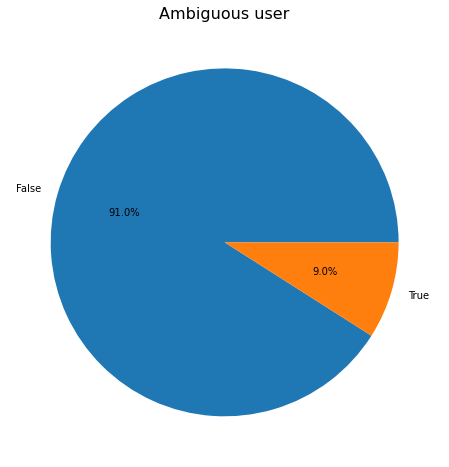

In [7]:
plt.figure(figsize=(16,8))
plt.pie(ambiguous_count['count'], labels=ambiguous_count['ambiguous'], autopct='%.1f%%')
plt.title('Ambiguous user', fontsize=16)
plt.show()

### Explicit the Wikibreaks

In [8]:
spanish_wikibreaks_refactored_df = list()
# iterating over the previous dataset
for i, row in spanish_wikibreaks_df.iterrows():
    # explicit the wikibreaks
    for el in row['wikibreaks']:
        new_row = row
        new_row = new_row.drop('wikibreaks')
        new_row['wikibreak'] = el['name']
        new_row['categories'] = el['categories']
        new_row['parameters'] = el['parameters']
        new_row['subcategory'] = el['subcategory']
        if el['to_date']:
            new_row['to_date'] = datetime.fromisoformat(el['to_date'])
        else:
            new_row['to_date'] = None
        new_row['from_date'] = datetime.fromisoformat(el['from_date'])
        spanish_wikibreaks_refactored_df.append(new_row)
spanish_wikibreaks_refactored_df = pd.DataFrame(spanish_wikibreaks_refactored_df).reset_index(drop=True)
# spanish_wikibreaks_refactored_df.head()

## Number of users still in wikibreaks or similar

In [9]:
still_in_breaks = spanish_wikibreaks_refactored_df.loc[pd.isnull(spanish_wikibreaks_refactored_df['to_date']), ['name', 'wikibreak', 'categories', 'subcategory']]
# still_in_breaks.head()

In [10]:
# still_in_breaks.describe()

In [11]:
users_still_in_breaks = still_in_breaks.groupby('name').count().reset_index()
# users_still_in_breaks.head()

In [12]:
users_still_in_breaks.describe()

wikibreak   categories  subcategory
count  1111.000000  1111.000000  1111.000000
mean      1.155716     1.155716     1.155716
std       0.362749     0.362749     0.362749
min       1.000000     1.000000     1.000000
25%       1.000000     1.000000     1.000000
50%       1.000000     1.000000     1.000000
75%       1.000000     1.000000     1.000000
max       2.000000     2.000000     2.000000

## Number of users still in wikibreaks with respect to the total amount of users who specified at least a wikibreak during their wikihistory

In [13]:
spanish_wikibreaks_df.shape[0]

2151

In [14]:
users_still_in_breaks.shape[0]

1111

In [15]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - users_still_in_breaks.shape[0], 'label': 'not in break'}
row_break = {'total': users_still_in_breaks.shape[0], 'label': 'in break'}
rows = [row_total, row_break]
percentage_still_in_break = pd.DataFrame(rows).reset_index(drop=True)
percentage_still_in_break

total         label
0   1040  not in break
1   1111      in break

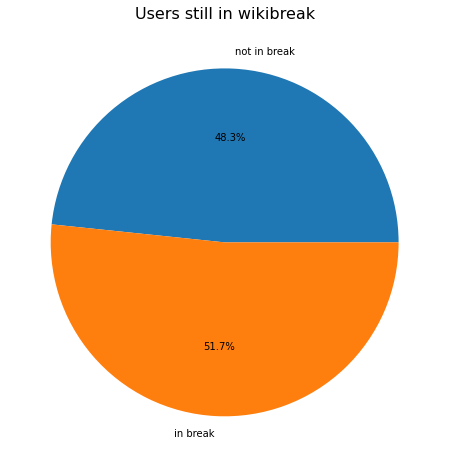

In [16]:
plt.figure(figsize=(16,8))
plt.pie(percentage_still_in_break['total'], labels=percentage_still_in_break['label'], autopct='%.1f%%')
plt.title('Users still in wikibreak', fontsize=16)
plt.show()

## Current wikibreaks templates

In [17]:
wikibreaks_still_in_breaks = still_in_breaks
wikibreaks_still_in_breaks['count'] = 1
wikibreaks_still_in_breaks = wikibreaks_still_in_breaks[['wikibreak', 'count']].groupby('wikibreak').count().reset_index().sort_values(['count'], ascending=False)
wikibreaks_still_in_breaks.head()

wikibreak  count
6   usuario retirado   1063
4    usuario ausente     85
9     wikivacaciones     53
2           retirado     39
5  usuario fallecido     27

In [18]:
wikibreaks_still_in_breaks.shape

(10, 2)

In [19]:
wikibreaks_still_in_breaks.describe()

count
count    10.000000
mean    128.400000
std     329.563078
min       1.000000
25%       1.750000
50%      18.500000
75%      49.500000
max    1063.000000

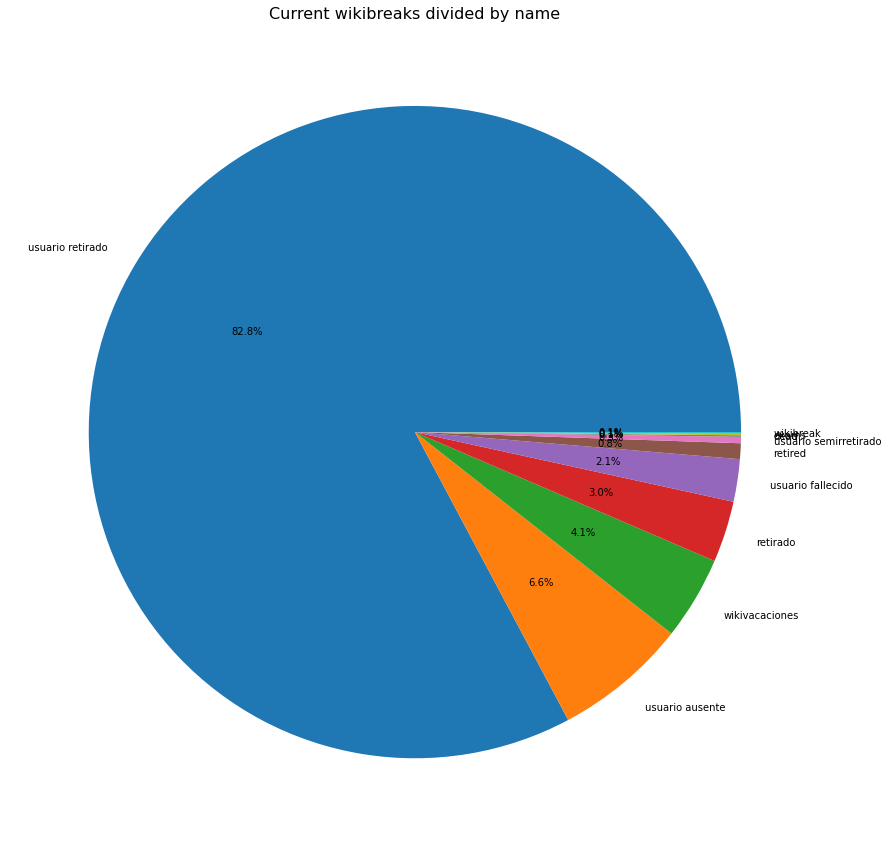

In [134]:
plt.figure(figsize=(19, 15))
plt.pie(wikibreaks_still_in_breaks['count'], labels=wikibreaks_still_in_breaks['wikibreak'], autopct='%.1f%%')
plt.title('Current wikibreaks divided by name', fontsize=16)
plt.show()

## Current subcategories

In [21]:
subcategories_still_in_breaks = still_in_breaks
subcategories_still_in_breaks['count'] = 1
subcategories_still_in_breaks = subcategories_still_in_breaks[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategories_still_in_breaks.head()

subcategory  count
2              retired   1112
5            wikibreak     86
4             vacation     53
0  deceased wikipedian     28
3         semi-retired      4

In [22]:
subcategories_still_in_breaks.shape

(6, 2)

In [23]:
subcategories_still_in_breaks.describe()

count
count     6.000000
mean    214.000000
std     441.083666
min       1.000000
25%      10.000000
50%      40.500000
75%      77.750000
max    1112.000000

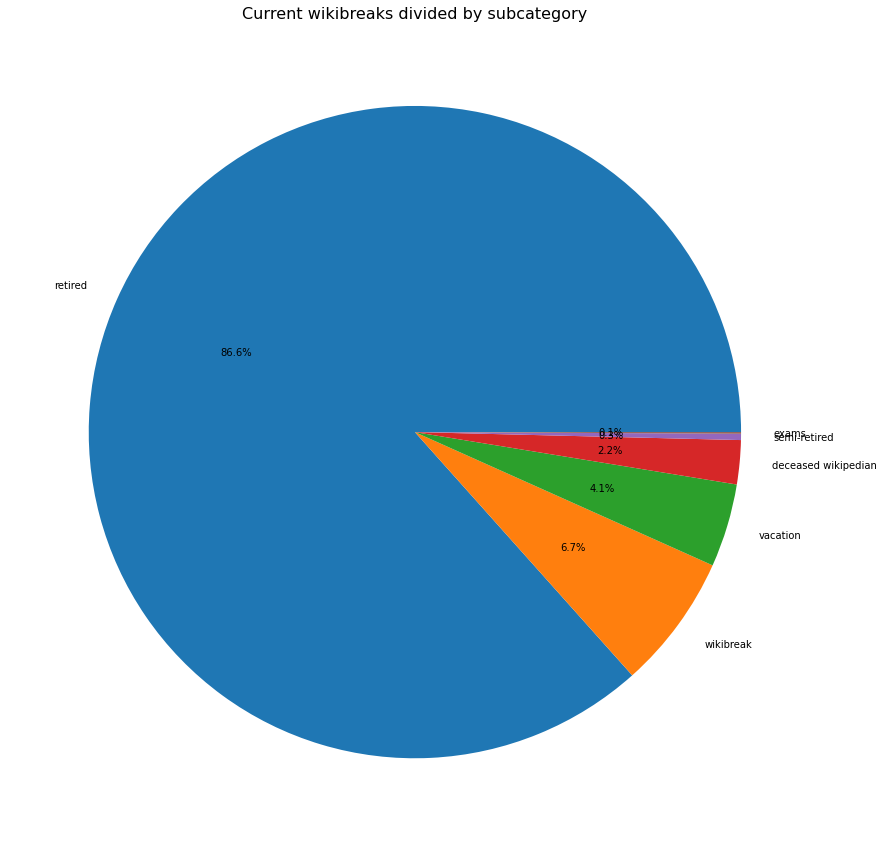

In [135]:
plt.figure(figsize=(19, 15))
plt.pie(subcategories_still_in_breaks['count'], labels=subcategories_still_in_breaks['subcategory'], autopct='%.1f%%')
plt.title('Current wikibreaks divided by subcategory', fontsize=16)
plt.show()

## Current wikibreaks

In [25]:
categories_still_in_breaks = still_in_breaks[['categories', 'name']]
categories_still_in_breaks_refactored = list()
for i, row in categories_still_in_breaks.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_still_in_breaks_refactored.append(new_row)
categories_still_in_breaks_refactored = pd.DataFrame(categories_still_in_breaks_refactored).reset_index(drop=True)
# categories_still_in_breaks_refactored.head()

In [26]:
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored
categories_still_in_breaks_refactored['count'] = 1
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
categories_still_in_breaks_refactored.head()

category  count
1    other   1144
0    break    140

In [27]:
categories_still_in_breaks_refactored.shape

(2, 2)

In [28]:
categories_still_in_breaks_refactored.describe()

count
count     2.000000
mean    642.000000
std     709.935208
min     140.000000
25%     391.000000
50%     642.000000
75%     893.000000
max    1144.000000

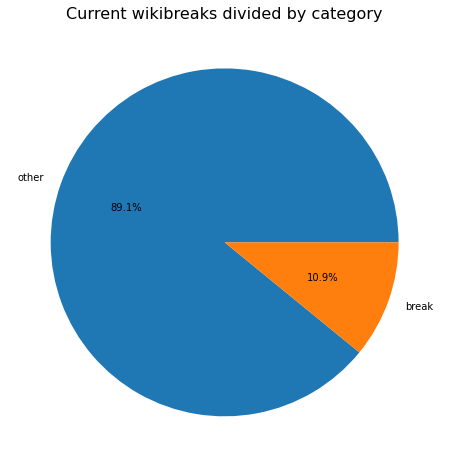

In [29]:
plt.figure(figsize=(16,8))
plt.pie(categories_still_in_breaks_refactored['count'], labels=categories_still_in_breaks_refactored['category'], autopct='%.1f%%')
plt.title('Current wikibreaks divided by category', fontsize=16)
plt.show()

# Line graph to see the flow of wikibreaks in Spanish Wikipedia

In [30]:
# unique wikibreaks
wikibreaks = spanish_wikibreaks_refactored_df['wikibreak'].unique()
wikibreaks

array(['usuario retirado', 'wikivacaciones', 'usuario ausente',
       'usuario fallecido', 'retirado', 'usuario semirretirado',
       'retired', 'dead', 'exams', 'wikibreak', 'atschool'], dtype=object)

In [31]:
# unique subcategories
subcategories = spanish_wikibreaks_refactored_df['subcategory'].unique()
subcategories

array(['retired', 'vacation', 'wikibreak', 'deceased wikipedian',
       'semi-retired', 'exams', 'at school'], dtype=object)

In [32]:
# unique categories
categories = list()
for i, row in spanish_wikibreaks_refactored_df[['categories', 'name']].iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories.append(new_row)
categories = pd.DataFrame(categories).reset_index(drop=True)
categories = categories['category'].unique()
categories

array(['other', 'break'], dtype=object)

In [33]:
# date to start from
start_from = spanish_wikibreaks_refactored_df['from_date'].min()
start_from

Timestamp('2005-08-20 08:25:35+0000', tz='UTC')

In [34]:
last_date = datetime.now().replace(tzinfo=pytz.UTC)
last_date

datetime.datetime(2021, 4, 22, 13, 0, 47, 498104, tzinfo=<UTC>)

In [35]:
breaks_history = list()
spanish_wikibreaks_simple_date = spanish_wikibreaks_refactored_df
spanish_wikibreaks_simple_date['from_date'] = spanish_wikibreaks_simple_date['from_date'].dt.normalize()
spanish_wikibreaks_simple_date['from_date'] = spanish_wikibreaks_simple_date['from_date'].apply(lambda r: r.replace(day=1))
spanish_wikibreaks_simple_date['to_date'] = spanish_wikibreaks_simple_date['to_date'].dt.normalize()
spanish_wikibreaks_simple_date['to_date'] = spanish_wikibreaks_simple_date['to_date'].apply(lambda r: r.replace(day=1))
# iterating over years
for year in range(start_from.year, last_date.year + 1):
    if year == start_from.year: # first year
        start_month = start_from.month
    else:
        start_month = 1
    
    if year == last_date.year: # last year
        last_month = last_date.month
    else:
        last_month = 12
    
    for month in range(start_month, last_month + 1):
        mask = (spanish_wikibreaks_simple_date['from_date'] <= datetime(year, month, 1).replace(tzinfo=pytz.UTC))
        mask_2 = (pd.isnull(spanish_wikibreaks_simple_date['to_date'])) | (spanish_wikibreaks_simple_date['to_date'] >= datetime(year, month, 1).replace(tzinfo=pytz.UTC)) 
        mask = mask & mask_2
        filtered = spanish_wikibreaks_simple_date[mask]
        for j, elem in filtered.iterrows():
            el = dict()
            el['year'] = year
            el['month'] = month
            el['subcategory'] = elem['subcategory']
            el['wikibreak'] = elem['wikibreak']
            el['categories'] = elem['categories']
            breaks_history.append(el)
breaks_history = pd.DataFrame(breaks_history).reset_index(drop=True)
breaks_history.head()

year  month subcategory       wikibreak categories
0  2005      8    vacation  wikivacaciones    [break]
1  2005      8    vacation  wikivacaciones    [break]
2  2005     11    vacation  wikivacaciones    [break]
3  2005     12    vacation  wikivacaciones    [break]
4  2005     12    vacation  wikivacaciones    [break]

In [36]:
breaks_history.shape

(154337, 5)

In [37]:
breaks_history.describe()

year          month
count  154337.000000  154337.000000
mean     2015.151461       6.474079
std         3.541715       3.473123
min      2005.000000       1.000000
25%      2012.000000       3.000000
50%      2015.000000       6.000000
75%      2018.000000      10.000000
max      2021.000000      12.000000

In [38]:
breaks_history_subcategory_count = breaks_history
breaks_history_subcategory_count['count'] = 1
breaks_history_subcategory_count = breaks_history_subcategory_count[['year', 'month', 'subcategory', 'count']].groupby(['year', 'month',  'subcategory']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_subcategory_count['date'] = pd.to_datetime(breaks_history_subcategory_count[['year','month']].assign(day=1)).dt.date
breaks_history_subcategory_count.head()

year  month subcategory  count        date
0  2005      8    vacation      2  2005-08-01
1  2005     11    vacation      1  2005-11-01
2  2005     12    vacation      6  2005-12-01
3  2006      1    vacation      3  2006-01-01
4  2006      3   wikibreak      5  2006-03-01

In [39]:
breaks_history_subcategory_count.tail()

year  month   subcategory  count        date
742  2021      4         exams      1  2021-04-01
743  2021      4       retired   1112  2021-04-01
744  2021      4  semi-retired      4  2021-04-01
745  2021      4      vacation     53  2021-04-01
746  2021      4     wikibreak     86  2021-04-01

In [40]:
breaks_history_subcategory_count.describe()

year       month        count
count   747.000000  747.000000   747.000000
mean   2014.432396    6.463186   206.609103
std       4.172124    3.468691   355.398768
min    2005.000000    1.000000     1.000000
25%    2011.000000    3.000000    10.000000
50%    2015.000000    6.000000    43.000000
75%    2018.000000    9.000000    77.000000
max    2021.000000   12.000000  1115.000000

#### Clean counter

In [41]:
breaks_history_subcategory_count_cleaned = list()
for date in breaks_history_subcategory_count['date'].unique():
    for subcat in subcategories:
        elem = breaks_history_subcategory_count.loc[(breaks_history_subcategory_count['date'] == date) & (breaks_history_subcategory_count['subcategory'] == subcat)]
        if elem.empty:
            breaks_history_subcategory_count_cleaned.append([date.year, date.month, subcat, 0, date])
        else:
            breaks_history_subcategory_count_cleaned.append(np.array(elem)[0])
breaks_history_subcategory_count_cleaned = pd.DataFrame(breaks_history_subcategory_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'subcategory', 'count', 'date'], axis=1)
breaks_history_subcategory_count_cleaned.head()

year  month          subcategory  count        date
0  2005      8              retired      0  2005-08-01
1  2005      8             vacation      2  2005-08-01
2  2005      8            wikibreak      0  2005-08-01
3  2005      8  deceased wikipedian      0  2005-08-01
4  2005      8         semi-retired      0  2005-08-01

## Subcategories during Spanish Wikipedia history

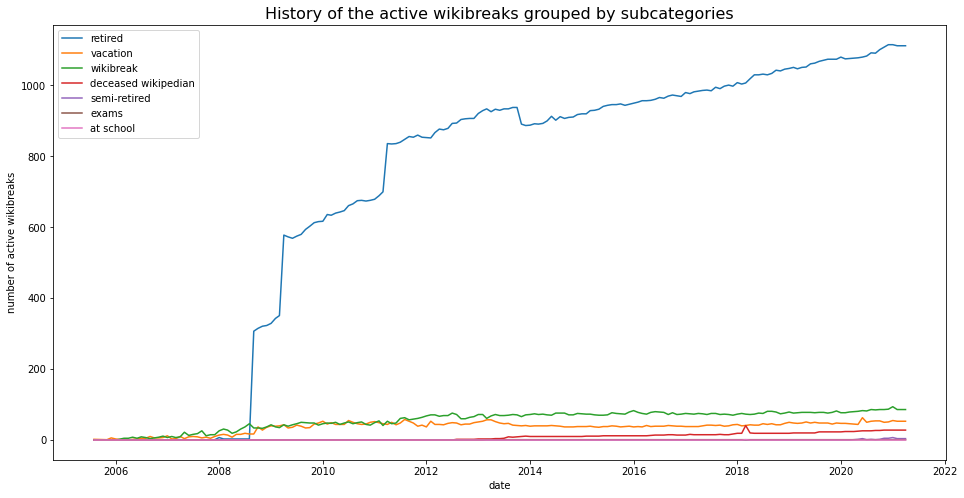

In [42]:
plt.figure(figsize=(16,8))
for subcategory in breaks_history_subcategory_count_cleaned['subcategory'].unique():
    subcat = breaks_history_subcategory_count_cleaned[breaks_history_subcategory_count_cleaned['subcategory'] == subcategory]
    plt.plot(subcat['date'], subcat['count'], label = subcategory)
plt.legend()
plt.title('History of the active wikibreaks grouped by subcategories', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [43]:
fig = px.line(breaks_history_subcategory_count_cleaned, x='date', y='count', color='subcategory', title='History of the active wikibreaks grouped by subcategories')
fig.show()

The same but with the names of the pauses

In [44]:
breaks_history_wikibreak_count = breaks_history
breaks_history_wikibreak_count['count'] = 1
breaks_history_wikibreak_count = breaks_history_wikibreak_count[['year', 'month', 'wikibreak', 'count']].groupby(['year', 'month', 'wikibreak']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_wikibreak_count['date'] = pd.to_datetime(breaks_history_wikibreak_count[['year','month']].assign(day=1)).dt.date
breaks_history_wikibreak_count.head()

year  month        wikibreak  count        date
0  2005      8   wikivacaciones      2  2005-08-01
1  2005     11   wikivacaciones      1  2005-11-01
2  2005     12   wikivacaciones      6  2005-12-01
3  2006      1   wikivacaciones      3  2006-01-01
4  2006      3  usuario ausente      5  2006-03-01

In [45]:
breaks_history_wikibreak_count.tail()

year  month              wikibreak  count        date
1255  2021      4      usuario fallecido     27  2021-04-01
1256  2021      4       usuario retirado   1063  2021-04-01
1257  2021      4  usuario semirretirado      4  2021-04-01
1258  2021      4              wikibreak      1  2021-04-01
1259  2021      4         wikivacaciones     53  2021-04-01

In [46]:
breaks_history_wikibreak_count.describe()

year        month        count
count  1260.000000  1260.000000  1260.000000
mean   2014.711905     6.450000   122.489683
std       3.967343     3.465918   284.519034
min    2005.000000     1.000000     1.000000
25%    2012.000000     3.000000     1.000000
50%    2015.000000     6.000000    10.000000
75%    2018.000000     9.000000    48.000000
max    2021.000000    12.000000  1065.000000

#### Clean counter

In [47]:
breaks_history_wikibreak_count_cleaned = list()
for date in breaks_history_wikibreak_count['date'].unique():
    for wb in wikibreaks:
        elem = breaks_history_wikibreak_count.loc[(breaks_history_wikibreak_count['date'] == date) & (breaks_history_wikibreak_count['wikibreak'] == wb)]
        if elem.empty:
            breaks_history_wikibreak_count_cleaned.append([date.year, date.month, wb, 0, date])
        else:
            breaks_history_wikibreak_count_cleaned.append(np.array(elem)[0])
breaks_history_wikibreak_count_cleaned = pd.DataFrame(breaks_history_wikibreak_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'wikibreak', 'count', 'date'], axis=1)
breaks_history_wikibreak_count_cleaned.head()

year  month          wikibreak  count        date
0  2005      8   usuario retirado      0  2005-08-01
1  2005      8     wikivacaciones      2  2005-08-01
2  2005      8    usuario ausente      0  2005-08-01
3  2005      8  usuario fallecido      0  2005-08-01
4  2005      8           retirado      0  2005-08-01

## Wikibreaks during Spanish Wikipedia history

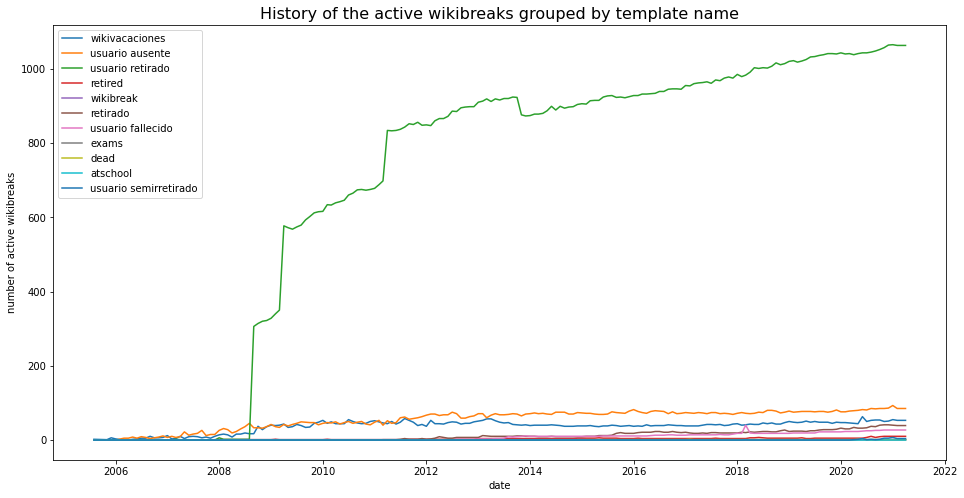

In [48]:
plt.figure(figsize=(16,8))
for wikibreak in breaks_history_wikibreak_count['wikibreak'].unique():
    wb = breaks_history_wikibreak_count_cleaned[breaks_history_wikibreak_count_cleaned['wikibreak'] == wikibreak]
    plt.plot(wb['date'], wb['count'], label = wikibreak)
plt.legend()
plt.title('History of the active wikibreaks grouped by template name', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [49]:
fig = px.line(breaks_history_wikibreak_count_cleaned, x='date', y='count', color='wikibreak', title='History of the active wikibreaks grouped by template name')
fig.show()

In [50]:
breaks_history_category_count = breaks_history[['year', 'month', 'subcategory', 'categories']]
breaks_history_category_count.head()

year  month subcategory categories
0  2005      8    vacation    [break]
1  2005      8    vacation    [break]
2  2005     11    vacation    [break]
3  2005     12    vacation    [break]
4  2005     12    vacation    [break]

In [51]:
breaks_history_category_count_refactored = list()
for i, row in breaks_history_category_count.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        breaks_history_category_count_refactored.append(new_row)
breaks_history_category_count_refactored = pd.DataFrame(breaks_history_category_count_refactored).reset_index(drop=True)
breaks_history_category_count_refactored.head()

year  month subcategory category
0  2005      8    vacation    break
1  2005      8    vacation    break
2  2005     11    vacation    break
3  2005     12    vacation    break
4  2005     12    vacation    break

In [52]:
breaks_history_category_count_refactored = breaks_history_category_count_refactored
breaks_history_category_count_refactored['count'] = 1
breaks_history_category_count_refactored = breaks_history_category_count_refactored[['year', 'month', 'category', 'count']].groupby(['year', 'month', 'category']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_category_count_refactored['date'] = pd.to_datetime(breaks_history_category_count_refactored[['year','month']].assign(day=1)).dt.date
breaks_history_category_count_refactored.head()

year  month category  count        date
0  2005      8    break      2  2005-08-01
1  2005     11    break      1  2005-11-01
2  2005     12    break      6  2005-12-01
3  2006      1    break      3  2006-01-01
4  2006      3    break      5  2006-03-01

In [53]:
breaks_history_category_count_refactored.tail()

year  month category  count        date
345  2021      2    other   1144  2021-02-01
346  2021      3    break    140  2021-03-01
347  2021      3    other   1144  2021-03-01
348  2021      4    break    140  2021-04-01
349  2021      4    other   1144  2021-04-01

In [54]:
breaks_history_category_count_refactored.shape

(350, 5)

In [55]:
breaks_history_wikibreak_count.describe()

year        month        count
count  1260.000000  1260.000000  1260.000000
mean   2014.711905     6.450000   122.489683
std       3.967343     3.465918   284.519034
min    2005.000000     1.000000     1.000000
25%    2012.000000     3.000000     1.000000
50%    2015.000000     6.000000    10.000000
75%    2018.000000     9.000000    48.000000
max    2021.000000    12.000000  1065.000000

#### Clean counter

In [56]:
breaks_history_category_count_refactored_cleaned = list()
for date in breaks_history_category_count_refactored['date'].unique():
    for cat in categories:
        elem = breaks_history_category_count_refactored.loc[(breaks_history_category_count_refactored['date'] == date) & (breaks_history_category_count_refactored['category'] == cat)]
        if elem.empty:
            breaks_history_category_count_refactored_cleaned.append([date.year, date.month, cat, 0, date])
        else:
            breaks_history_category_count_refactored_cleaned.append(np.array(elem)[0])
breaks_history_category_count_refactored_cleaned = pd.DataFrame(breaks_history_category_count_refactored_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'category', 'count', 'date'], axis=1)
breaks_history_category_count_refactored_cleaned.head()

year  month category  count        date
0  2005      8    other      0  2005-08-01
1  2005      8    break      2  2005-08-01
2  2005     11    other      0  2005-11-01
3  2005     11    break      1  2005-11-01
4  2005     12    other      0  2005-12-01

## Categories during Spanish Wikipedia history

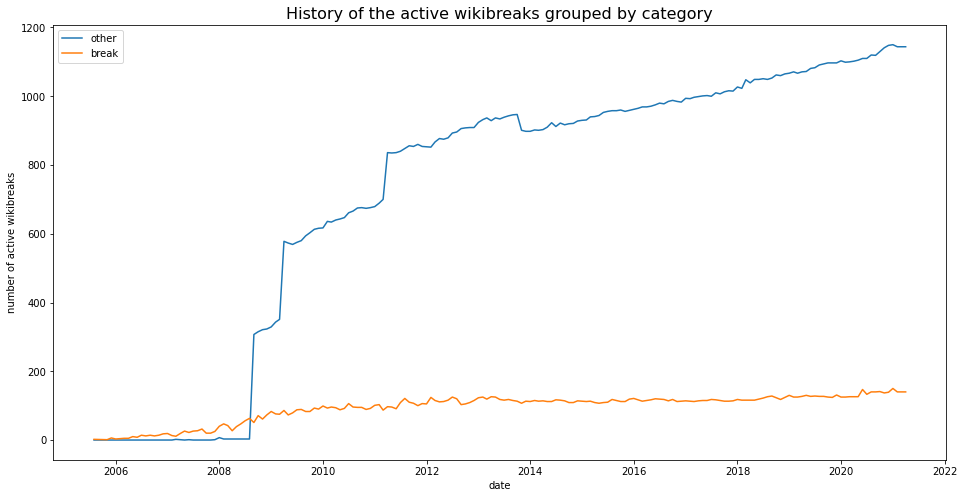

In [57]:
plt.figure(figsize=(16,8))
for cat in breaks_history_category_count_refactored_cleaned['category'].unique():
    category = breaks_history_category_count_refactored_cleaned[breaks_history_category_count_refactored_cleaned['category'] == cat]
    plt.plot(category['date'], category['count'], label = cat)
plt.legend()
plt.title('History of the active wikibreaks grouped by category', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [58]:
fig = px.line(breaks_history_category_count_refactored_cleaned, x='date', y='count', color='category', title='History of the active wikibreaks grouped by category')
fig.show()

## Total number of times a certain template was used

In [59]:
# spanish_wikibreaks_refactored_df.head()

In [60]:
wikibreak_used = spanish_wikibreaks_refactored_df
wikibreak_used['count'] = 1
wikibreak_used = wikibreak_used[['wikibreak', 'count']].groupby('wikibreak').count().reset_index().sort_values(['count'], ascending=False)
wikibreak_used.head()

wikibreak  count
7    usuario retirado   1856
5     usuario ausente   1081
10     wikivacaciones    786
3            retirado    105
6   usuario fallecido     58

In [61]:
wikibreak_used.shape

(11, 2)

In [62]:
wikibreak_used.describe()

count
count    11.000000
mean    357.363636
std     619.804045
min       1.000000
25%       2.000000
50%      27.000000
75%     445.500000
max    1856.000000

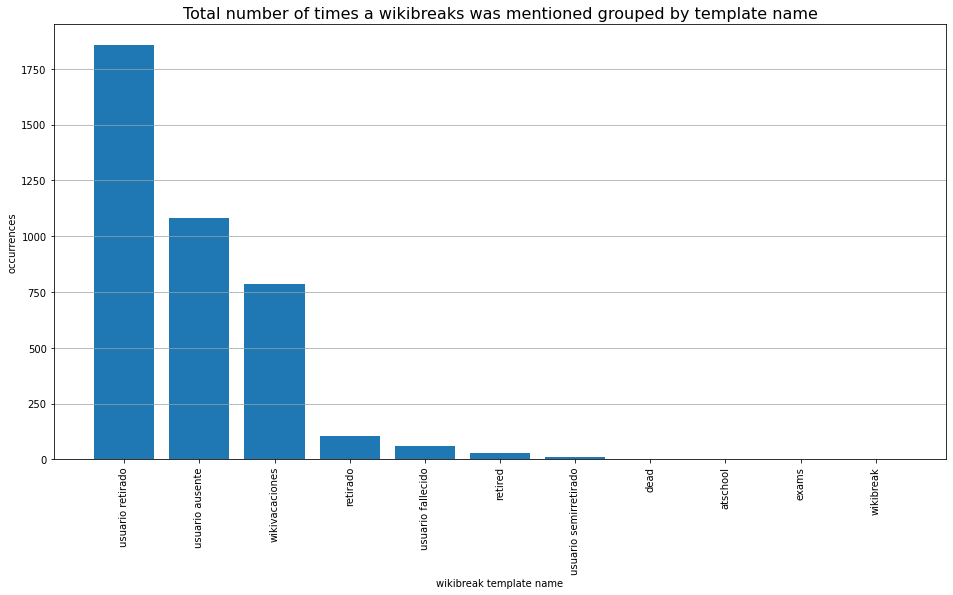

In [63]:
plt.figure(figsize=(16,8))
plt.bar(wikibreak_used['wikibreak'], wikibreak_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreaks was mentioned grouped by template name', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain subcategory was mentioned

In [64]:
subcategory_used = spanish_wikibreaks_refactored_df
subcategory_used['count'] = 1
subcategory_used = subcategory_used[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategory_used.head()

subcategory  count
3              retired   1988
6            wikibreak   1082
5             vacation    786
1  deceased wikipedian     61
4         semi-retired     12

In [65]:
subcategory_used.shape

(7, 2)

In [66]:
subcategory_used.describe()

count
count     7.000000
mean    561.571429
std     767.788351
min       1.000000
25%       6.500000
50%      61.000000
75%     934.000000
max    1988.000000

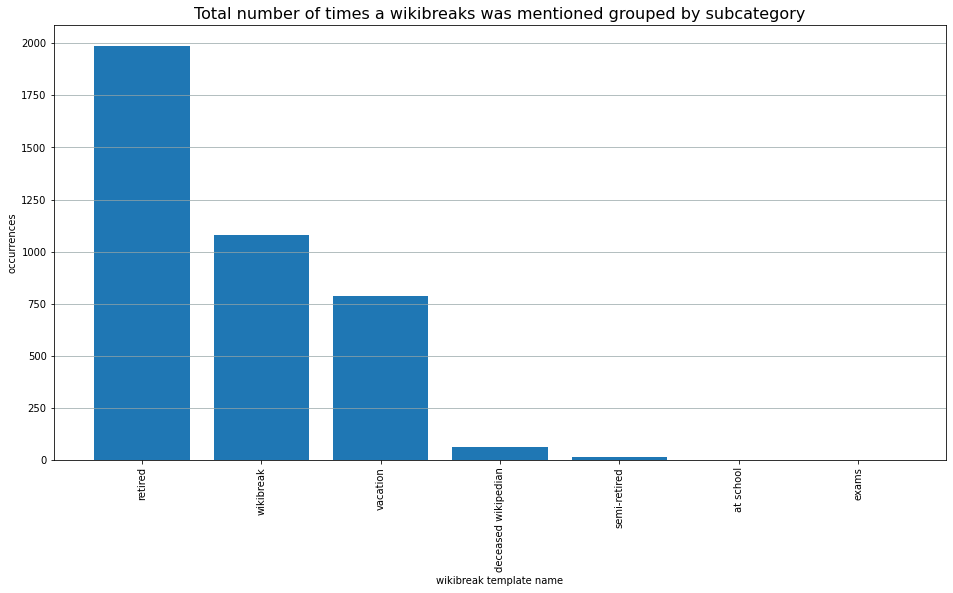

In [67]:
plt.figure(figsize=(16,8))
plt.bar(subcategory_used['subcategory'], subcategory_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.title('Total number of times a wikibreaks was mentioned grouped by subcategory', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain category was mentioned

In [68]:
category_used = still_in_breaks[['categories', 'name']]
category_used = list()
for i, row in spanish_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        category_used.append(new_row)
category_used = pd.DataFrame(category_used).reset_index(drop=True)
# category_used.head()

In [69]:
category_used['count'] = 1
category_used = category_used[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
category_used.head()

category  count
1    other   2061
0    break   1870

In [70]:
category_used.shape

(2, 2)

In [71]:
category_used.describe()

count
count     2.000000
mean   1965.500000
std     135.057395
min    1870.000000
25%    1917.750000
50%    1965.500000
75%    2013.250000
max    2061.000000

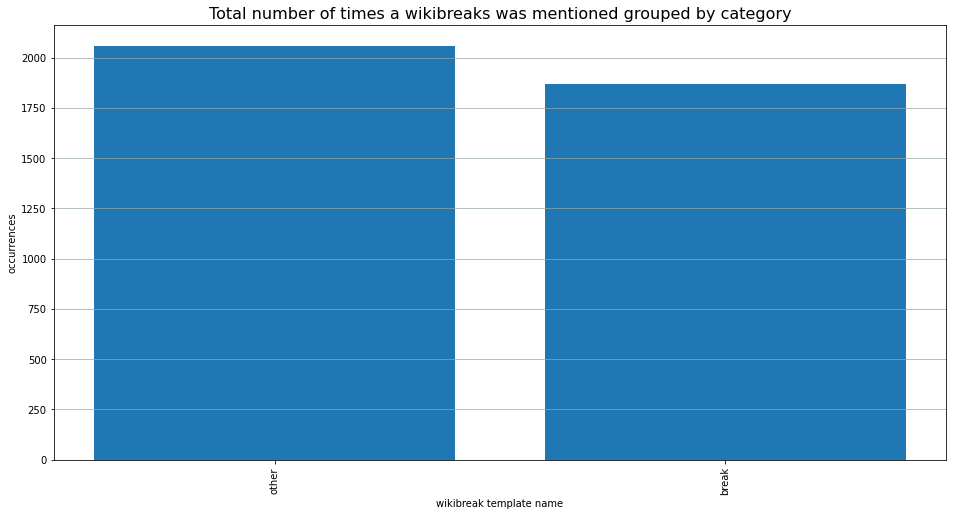

In [72]:
plt.figure(figsize=(16,8))
plt.bar(category_used['category'], category_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreaks was mentioned grouped by category', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same template)

In [73]:
# spanish_wikibreaks_refactored_df.head()

In [74]:
users_multiple_times_wikibreak = spanish_wikibreaks_refactored_df
users_multiple_times_wikibreak['count'] = 1
# users_multiple_times_wikibreak.head()

In [75]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak.head()

In [76]:
total_users = spanish_wikibreaks_df.shape[0]
total_users

2151

In [77]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak.loc[users_multiple_times_wikibreak['count'] >= 2]
# users_multiple_times_wikibreak.head()

In [78]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

723

In [79]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0   1428     single time
1    723  multiple times

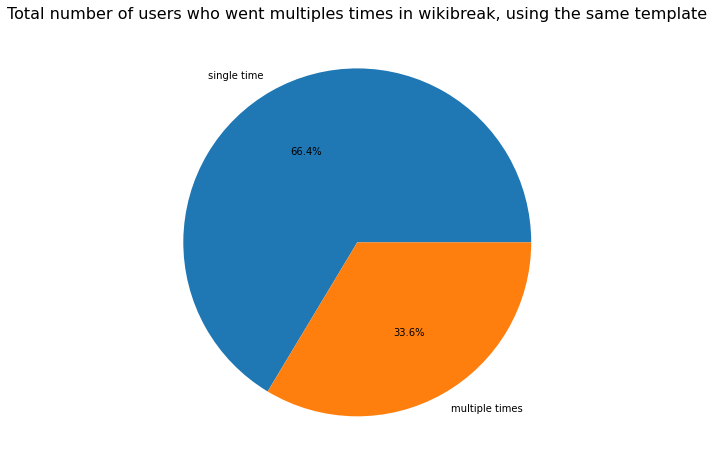

In [80]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template', fontsize=16)
plt.show()

### Remove ambiguous users 

In [81]:
users_multiple_times_wikibreak_not_ambiguous = spanish_wikibreaks_refactored_df
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['ambiguous'] == False, ['name', 'wikibreak']]
users_multiple_times_wikibreak_not_ambiguous['count'] = 1
# users_multiple_times_wikibreak_not_ambiguous.head()

In [82]:
users_multiple_times_wikibreak_not_ambiguous.shape

(3408, 3)

In [83]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak_not_ambiguous.head()

In [84]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['count'] >= 2]
# users_multiple_times_wikibreak_not_ambiguous.head()

In [85]:
total_users_multiple_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.shape[0]
total_users_multiple_wikibreak_not_ambiguous

511

Still over the total amount of users

In [86]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple_wikibreak_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_wikibreak_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0   1640     single time
1    511  multiple times

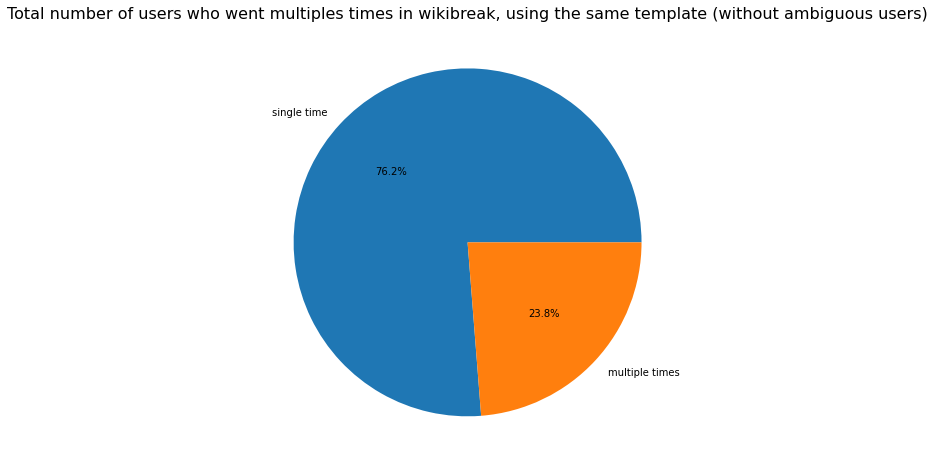

In [87]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same subcategory)

In [88]:
# spanish_wikibreaks_refactored_df.head()

In [89]:
users_multiple_times_subcategory = spanish_wikibreaks_refactored_df
users_multiple_times_subcategory['count'] = 1
# users_multiple_times_subcategory.head()

In [90]:
users_multiple_times_subcategory.shape

(3931, 11)

In [91]:
users_multiple_times_subcategory = users_multiple_times_subcategory[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory.head()

In [92]:
users_multiple_times_subcategory = users_multiple_times_subcategory.loc[users_multiple_times_subcategory['count'] >= 2]
# users_multiple_times_subcategory.head()

In [93]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

723

In [94]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0   1428     single time
1    723  multiple times

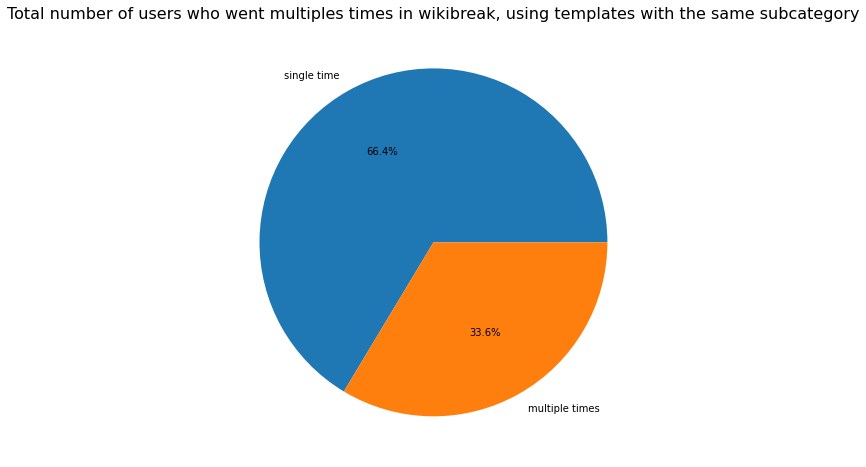

In [95]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory', fontsize=16)
plt.show()

### Remove ambiguous users 

In [96]:
users_multiple_times_subcategory_not_ambiguous = spanish_wikibreaks_refactored_df
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['ambiguous'] == False, ['name', 'subcategory']]
users_multiple_times_subcategory_not_ambiguous['count'] = 1
# users_multiple_times_subcategory_not_ambiguous.head()

In [97]:
users_multiple_times_subcategory_not_ambiguous.shape

(3408, 3)

In [98]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory_not_ambiguous.head()

In [99]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['count'] >= 2]
# users_multiple_times_subcategory_not_ambiguous.head()

In [100]:
total_users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.shape[0]
total_users_multiple_times_subcategory_not_ambiguous

515

Still over the total

In [101]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple_times_subcategory_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_times_subcategory_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0   1636     single time
1    515  multiple times

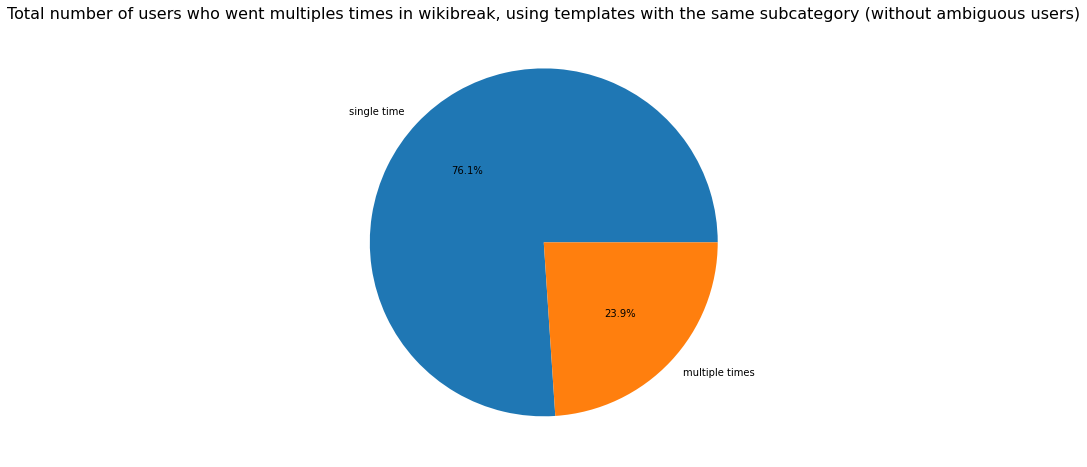

In [102]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same category)

In [103]:
# spanish_wikibreaks_refactored_df.head()

#### Explicit the category

In [104]:
categories_multiple_times = spanish_wikibreaks_refactored_df[['categories', 'name']]
categories_multiple_times_refactored = list()
for i, row in spanish_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_multiple_times_refactored.append(new_row)
categories_multiple_times_refactored = pd.DataFrame(categories_multiple_times_refactored).reset_index(drop=True)
# categories_multiple_times_refactored.head()

In [105]:
categories_multiple_times.shape

(3931, 2)

In [106]:
categories_multiple_times_refactored = categories_multiple_times_refactored
categories_multiple_times_refactored['count'] = 1
# categories_multiple_times_refactored.head()

In [107]:
categories_multiple_times_refactored = categories_multiple_times_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# categories_multiple_times_refactored.head()

In [108]:
categories_multiple_times_refactored = categories_multiple_times_refactored.loc[categories_multiple_times_refactored['count'] >= 2]
# categories_multiple_times_refactored.head()

In [109]:
total_category_multiple = categories_multiple_times_refactored.shape[0]
total_category_multiple

730

In [110]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_category_multiple, 'label': 'single time'}
row_multiple = {'total': total_category_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0   1421     single time
1    730  multiple times

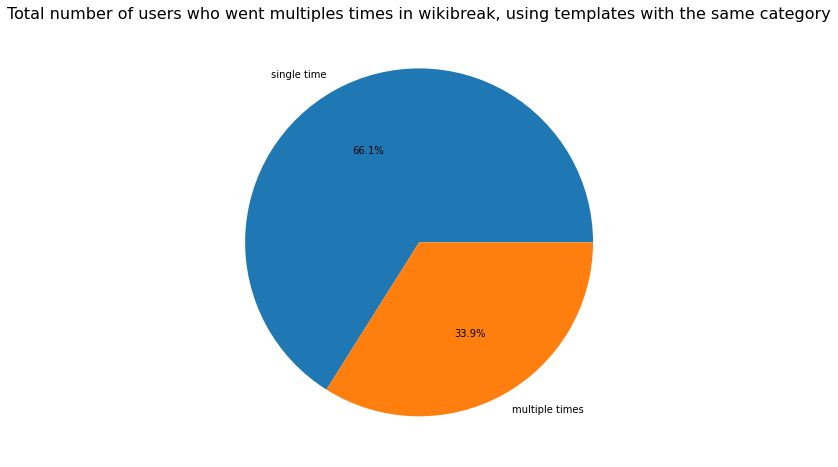

In [111]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category', fontsize=16)
plt.show()

### Remove ambiguous users 

In [112]:
users_multiple_times_category_not_ambiguous = spanish_wikibreaks_refactored_df
users_multiple_times_category_not_ambiguous = users_multiple_times_category_not_ambiguous.loc[users_multiple_times_category_not_ambiguous['ambiguous'] == False, ['name', 'categories']]
users_multiple_times_category_not_ambiguous['count'] = 1
# users_multiple_times_category_not_ambiguous.head()

In [113]:
users_multiple_times_category_not_ambiguous_refactored = list()
for i, row in users_multiple_times_category_not_ambiguous.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        users_multiple_times_category_not_ambiguous_refactored.append(new_row)
users_multiple_times_category_not_ambiguous_refactored = pd.DataFrame(users_multiple_times_category_not_ambiguous_refactored).reset_index(drop=True)
# users_multiple_times_category_not_ambiguous_refactored.head()

In [114]:
users_multiple_times_category_not_ambiguous_refactored.shape

(3408, 3)

In [115]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# users_multiple_times_category_not_ambiguous_refactored.head()

In [116]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored.loc[users_multiple_times_category_not_ambiguous_refactored['count'] >= 2]
# users_multiple_times_category_not_ambiguous_refactored.head()

In [117]:
total_category_multiple_not_ambiguous = users_multiple_times_category_not_ambiguous_refactored.shape[0]
total_category_multiple_not_ambiguous

522

In [118]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_category_multiple_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_category_multiple_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

total           label
0   1629     single time
1    522  multiple times

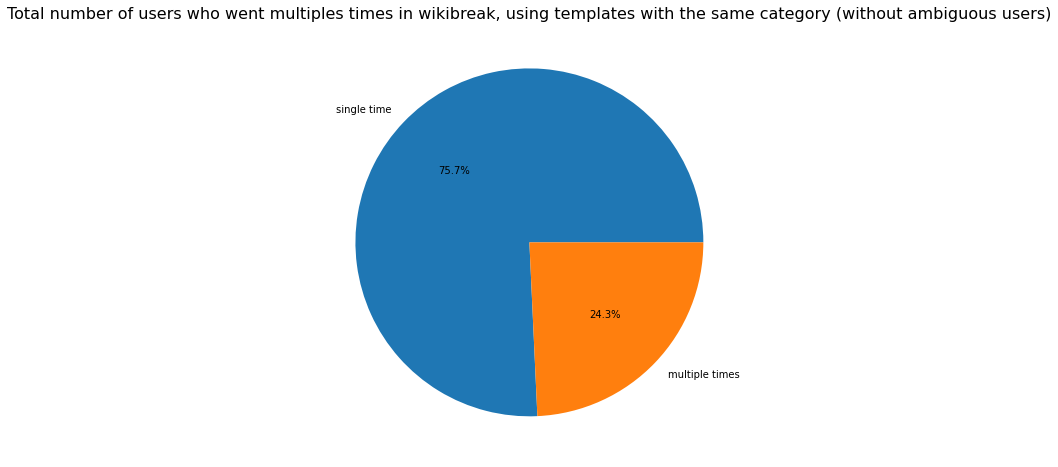

In [119]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category (without ambiguous users)', fontsize=16)

plt.show()

# Parameters analysis

In [120]:
# spanish_wikibreaks_refactored_df.head()

## Explicit the parameters associated with the wikibreak considering each wikibreak of each user

In [121]:
parameters_explicited = list()
for i, row in spanish_wikibreaks_refactored_df.iterrows():
    for el in row['parameters']:
        new_row = row
        new_row = new_row.drop('parameters')
        new_row['parameters'] = el['options']
        parameters_explicited.append(new_row)
parameters_explicited = pd.DataFrame(parameters_explicited).reset_index(drop=True)
# parameters_explicited.head()

### Wikibreak analysis

In [122]:
wikibreaks_parameters_df_list = list()

for wikibreak in wikibreaks:
    tmp_df = parameters_explicited.loc[parameters_explicited['wikibreak'] == wikibreak, ['name', 'parameters', 'count', 'wikibreak']]
    wikibreaks_parameters_df_list.append(tmp_df.reset_index(drop=True))

In [123]:
# wikibreaks_parameters_df_list[0].head()

Empty or filled parameters

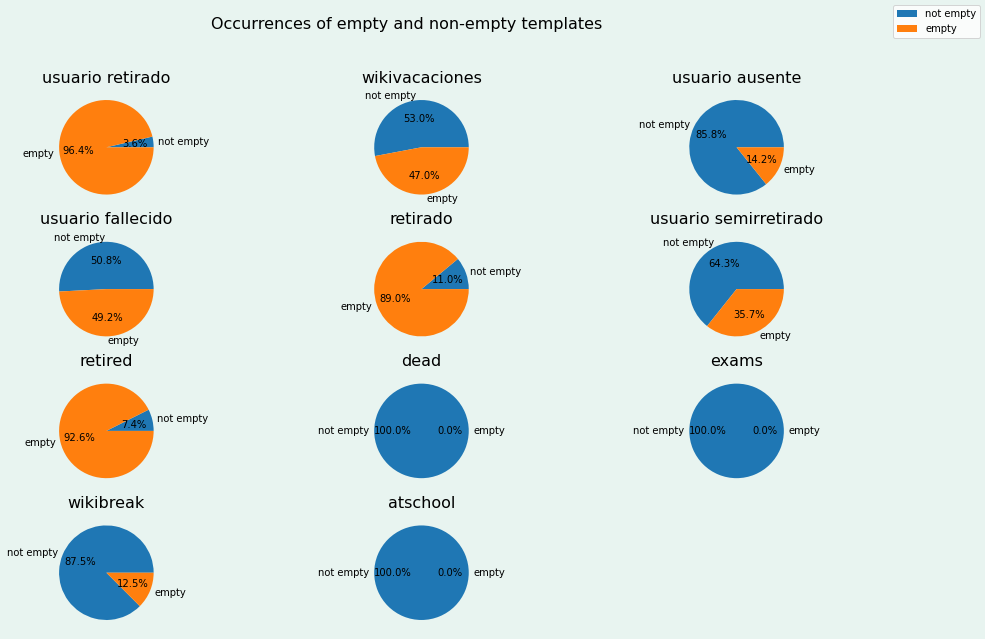

In [124]:
fig, axes = plt.subplots(math.ceil(len(wikibreaks)/3), 3, figsize=(16, 10), facecolor='#e8f4f0', squeeze=False)

last_axes = None

for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] == {}, ['wikibreak', 'parameters', 'count']].groupby(['wikibreak']).count().reset_index(drop=True)
    total_empty = grouped['count']
    
    if not total_empty.empty:
        total_empty = total_empty[0]
    else:
        total_empty = 0
    
    # total empty over total
    row_total = {'total': extracted.shape[0] - total_empty, 'label': 'not empty'}
    row_empty = {'total': total_empty, 'label': 'empty'}
    rows = [row_total, row_empty]
    percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
    
    # figure
    ax = axes[i // 3, i % 3]
    ax.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
    ax.set_title(wikibreak, fontsize=16)
    
    last_axes = i % 3
    
    
for i in range((math.ceil(len(wikibreaks)/3) - 1) * 3 + last_axes + 1, math.ceil(len(wikibreaks)/3) * 3):
    fig.delaxes(axes.flatten()[i])

    
fig.suptitle('Occurrences of empty and non-empty templates', fontsize=16)
fig.legend(['not empty', 'empty'])
plt.show()

Total filled over parameterized

In [125]:
total_without_parameters = parameters_explicited.loc[parameters_explicited['parameters'] == {}, ['wikibreak', 'parameters', 'count']]
total_without_parameters.head()

wikibreak parameters  count
0  usuario retirado         {}      1
1  usuario retirado         {}      1
2  usuario retirado         {}      1
4  usuario retirado         {}      1
5  usuario retirado         {}      1

In [126]:
row_total = {'total': parameters_explicited.shape[0] - total_without_parameters.shape[0], 'label': 'not empty'}
row_empty = {'total': total_without_parameters.shape[0], 'label': 'empty'}
rows = [row_total, row_empty]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times.head()

total      label
0   1989  not empty
1   2619      empty

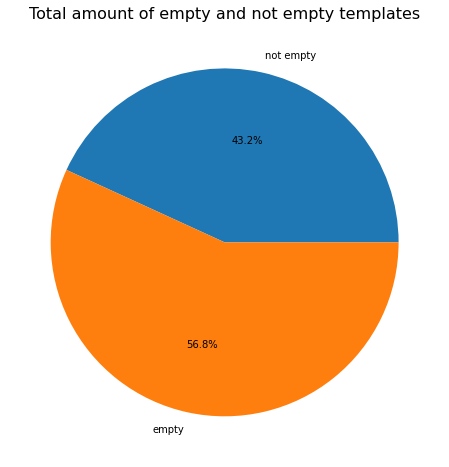

In [127]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total amount of empty and not empty templates', fontsize=16)
plt.show()

## Most used parameter per template

In [128]:
# dataframes for wikibreaks with param name and value
last_axes = None
most_used_parameters_per_template_df_list = list()

for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] != {}, ['wikibreak', 'parameters', 'count']]
    most_used_parameters_per_template_list = list()
    for i, row in extracted.iterrows():
        for key, value in row['parameters'].items():
            new_row = row
            new_row = new_row.drop('parameters')
            new_row['param_name'] = key
            new_row['param_value'] = value
            most_used_parameters_per_template_list.append(new_row)
    most_used_parameters_per_template_df_list.append(pd.DataFrame(most_used_parameters_per_template_list).reset_index(drop=True))

#most_used_parameters_per_template_df_list[0].head()

In [129]:
most_used_parameters_per_template_df_list[0].shape

(68, 5)

In [130]:
most_used_parameters_per_template_grouped_df_list = list()
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        extracted['param_name'] = extracted['param_name'].str.strip()
        extracted = extracted[['count', 'wikibreak', 'param_name']].groupby(['param_name', 'wikibreak']).count().reset_index(drop=False)
    most_used_parameters_per_template_grouped_df_list.append(extracted)
most_used_parameters_per_template_grouped_df_list[0].head()

param_name         wikibreak  count
0          1  usuario retirado     68

## Most used parameters per wikibreak

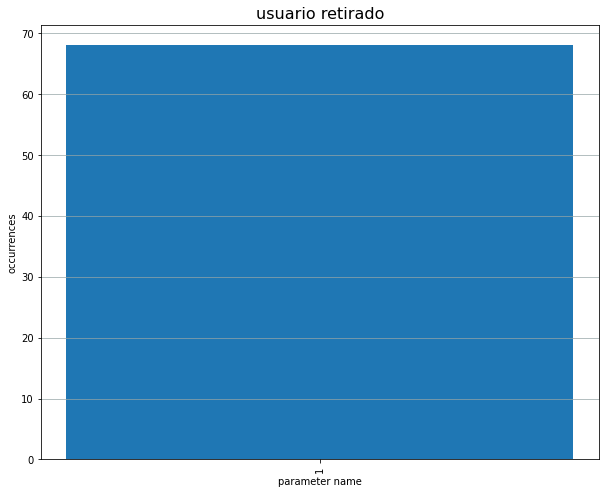

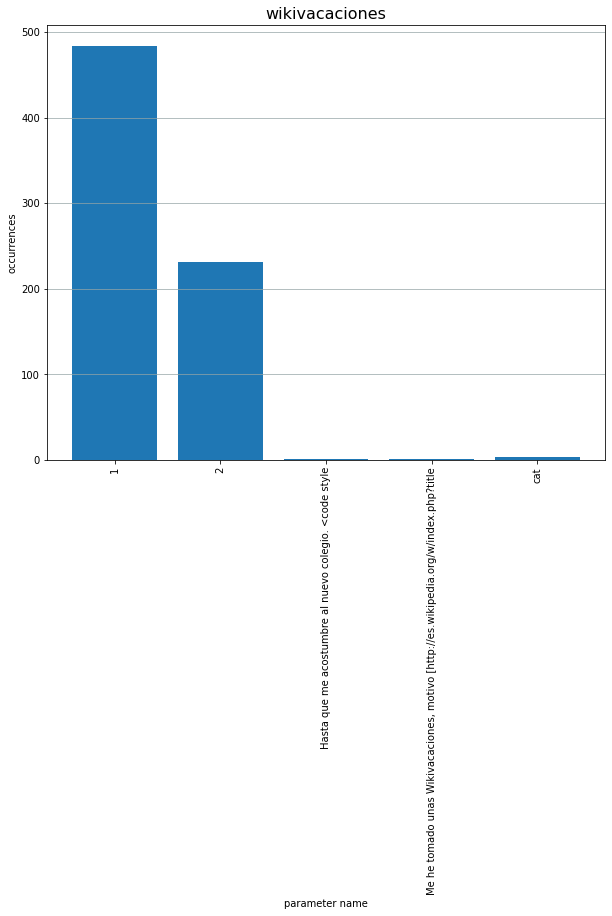

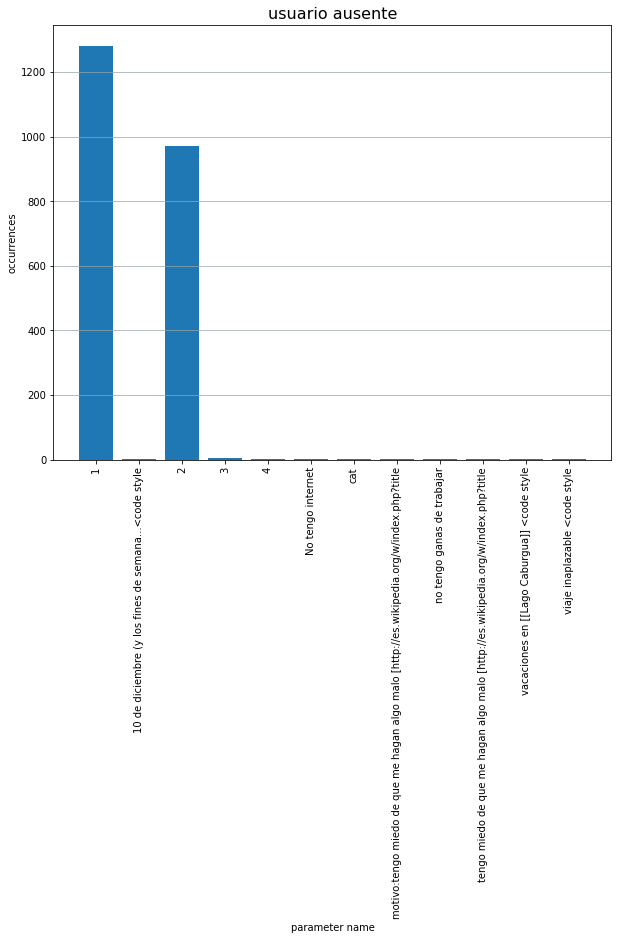

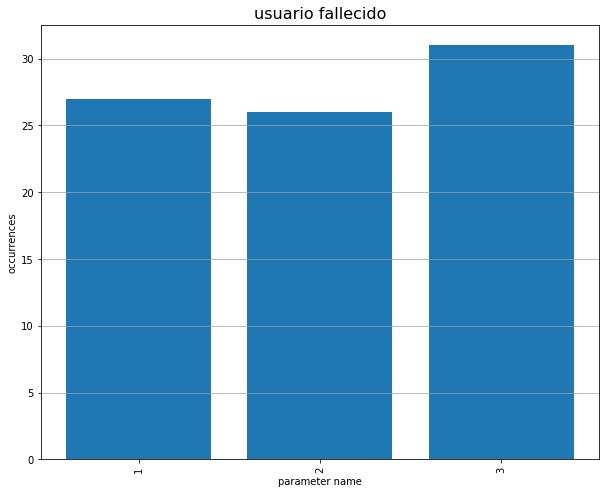

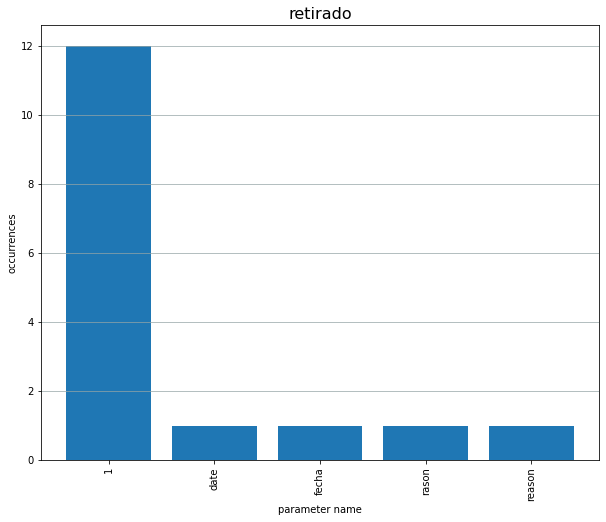

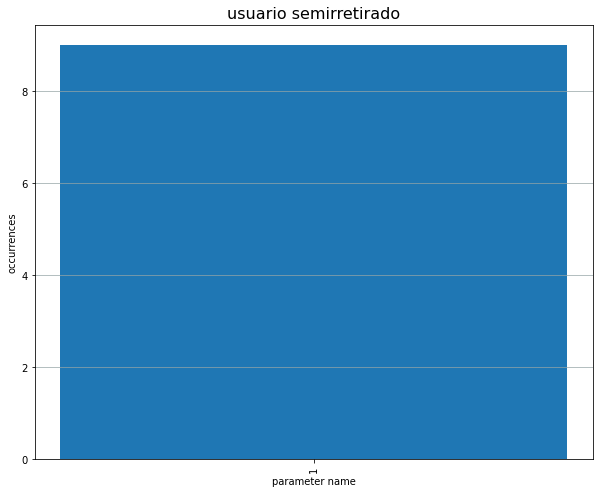

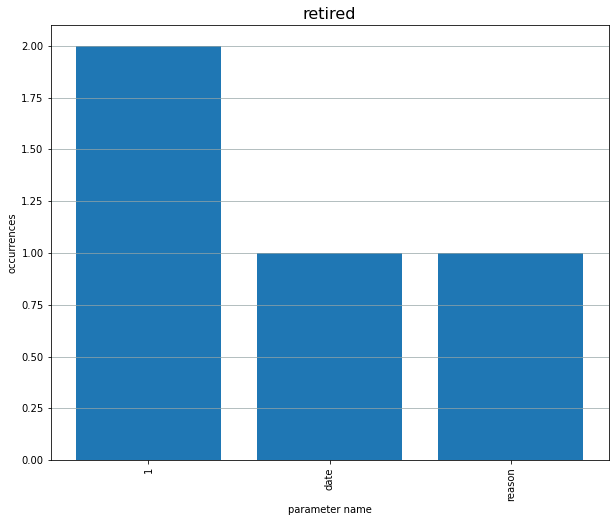

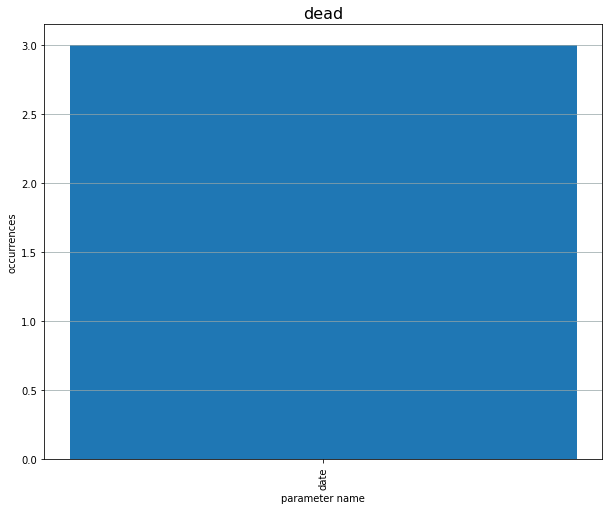

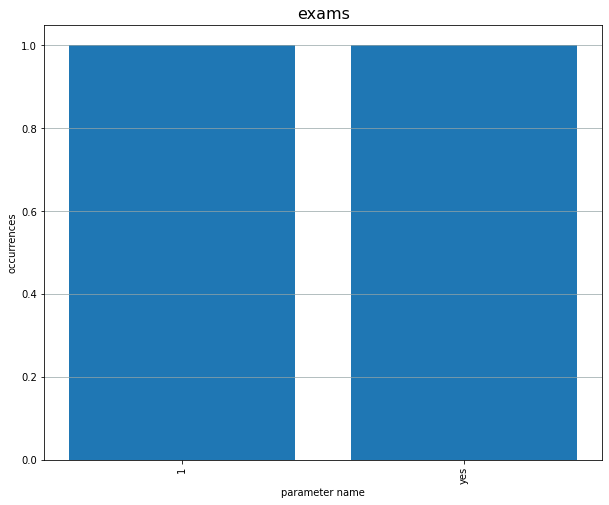

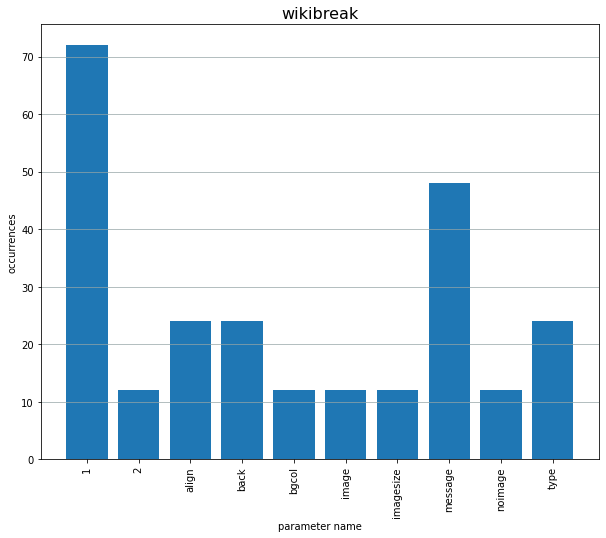

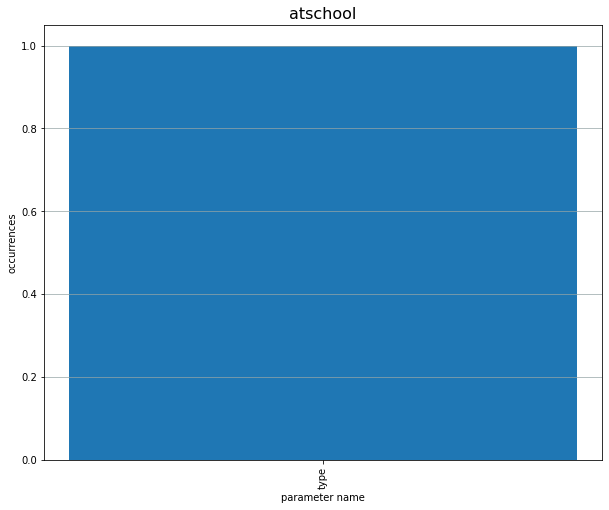

In [154]:
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i]
    
    if not extracted.empty:
        plt.figure(figsize=(10,8))
        plt.bar(most_used_parameters_per_template_grouped_df_list[i]['param_name'], most_used_parameters_per_template_grouped_df_list[i]['count'])
        plt.title(wikibreak, fontsize=16)
        plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
        plt.xticks(rotation='vertical')
        plt.ylabel('occurrences')
        plt.xlabel('parameter name')
        plt.show()

## Some paramers in textual form

In [132]:
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        print('Template name: ', wikibreak)
        print('------------------------------------------------------------------')
        for i, val in extracted.sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
        print('------------------------------------------------------------------')

Template name:  usuario retirado
------------------------------------------------------------------
Param name: 1 param value: para empezar de nuevo con otra cuenta. occurrences: 1
Param name: 1 param value: por haber contribuido a la Wikipedia lo suficiente occurrences: 1
Param name: 1 param value: Adiós Wikipedia y todos los buenos usuarios que conocí, aquí y en Wikipedia en inglés, dejaré [https://es.wikipedia.org/w/index.php?title=Wikipedia:Tabl%C3%B3ndeanunciosdelosbibliotecarios/Portal/Archivo/Miscel%C3%A1nea/Actual&diff=126993876&oldid=126989996 aquí mis motivos]. ¡Saludos! occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Últimamente ya no entro a wikipedia asi que me r

Param name: 1 param value: ...calculo que finales de noviembre occurrences: 1
Param name: 1 param value: ...calculo que finales de noviembre occurrences: 1
Param name: 1 param value: ... occurrences: 1
Param name: 1 param value: final de mes occurrences: 1
Param name: 1 param value: 11 de enero occurrences: 1
Param name: 1 param value: 11 de enero occurrences: 1
Param name: 1 param value: 11 de enero occurrences: 1
Param name: 1 param value: 01/10/2011 occurrences: 1
Param name: 1 param value: 11/10/2011 occurrences: 1
Param name: 1 param value: 11/10/2011 occurrences: 1
Param name: 1 param value: 25 de marzo  occurrences: 1
Param name: 1 param value: 24 de diciembre de 2011 occurrences: 1
Param name: 1 param value: 2 de enero occurrences: 1
Param name: 1 param value: final de unos asuntillos laborales (no todo va a ser [[enciclopedismo]]) occurrences: 1
Param name: 1 param value: final de unos asuntillos laborales (no todo va a ser [[enciclopedismo]]) occurrences: 1
Param name: 1 para

Param name: 1 param value: 26 de Enero occurrences: 1
Param name: 1 param value: 26 de Enero occurrences: 1
Param name: 1 param value: no lo sé occurrences: 1
Param name: 1 param value: 2 de febrero occurrences: 1
Param name: 1 param value: 2 de febrero occurrences: 1
Param name: 1 param value: El dia en que vuelva, mas o menos el ventitantos de febrero occurrences: 1
Param name: 1 param value: Martes :D occurrences: 1
Param name: 1 param value: mes de marzo occurrences: 1
Param name: 1 param value: mediados de agosto occurrences: 1
Param name: 1 param value: viaje y hastío occurrences: 1
Param name: 1 param value: Toxicidad occurrences: 1
Param name: 1 param value: final del verano en el hemisferio norte. [[Image:Face-smile.svg|30px]] Nos vemos a la vuelta (pero el bot seguirá archivando) occurrences: 1
Param name: 1 param value: viernes 4 occurrences: 1
Param name: 1 param value: viernes 4, aunque pasaré por aquí de vez en cuando occurrences: 1
Param name: 1 param value: 14 de diciem

Param name: 2 param value: Viaje de fin de 2006/comienzo de 2007. [[Año nuevo|¡Feliz año!]] occurrences: 1
Param name: 2 param value: Mal funcionamiento de mi ordenador, se enciende cuando quiere occurrences: 1
Param name: 2 param value: festejando la navidad occurrences: 1
Param name: 2 param value: festejando la navidad occurrences: 1
Param name: 2 param value: descanso occurrences: 1
Param name: 2 param value: descanso occurrences: 1
Param name: 2 param value: descanso voluntario occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param 

Param name: 2 param value: Fiestas de fin de año, [[Navidad]] y [[Año Nuevo]] occurrences: 1
Param name: 2 param value: Fiestas de fin de año, [[Navidad]] y [[Año Nuevo]]. occurrences: 1
Param name: 2 param value: Fiestas de fin de año, [[Navidad]] y [[Año Nuevo]]. occurrences: 1
Param name: 2 param value: Fiestas de fin de año, [[Navidad]] y [[Año Nuevo]]. occurrences: 1
Param name: 2 param value: Estudio y rendición de la [[Prueba de Selección Universitaria]]) occurrences: 1
Param name: 2 param value: Visita a familiares en [[Nancagua]], [[VI Región del Libertador General Bernardo O'Higgins|Sexta Región]] occurrences: 1
Param name: 2 param value: ¡Vacaciones! occurrences: 1
Param name: 2 param value: Viaje a [[Perú]] con [[User:Galio|Galio]], [[User:Mahadeva|Mahadeva]], [[User:Pyr0|Pyr0]] y [[User:Aleposta|Aleposta]] occurrences: 1
Param name: 2 param value: Viaje a [[Perú]] con [[User:Galio|Galio]], [[User:Mahadeva|Mahadeva]], [[User:Pyr0|Pyr0]], [[User:Aleposta|Aleposta]] y [[User:

Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de j

Param name: 1 param value: 23 de octubre de 2013 occurrences: 1
Param name: 1 param value: 6 de marzo de 2015 occurrences: 1
Param name: 1 param value: Indefinido occurrences: 1
Param name: 1 param value: fin del mundo occurrences: 1
Param name: 1 param value: indefinido occurrences: 1
Param name: 1 param value: 1 de agosto de 2011 occurrences: 1
Param name: 1 param value: 21 de enero de 2012 occurrences: 1
Param name: 1 param value: diciembre de 2018 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occurrences: 1
Param name: 1 param value: 7/6/07 occur

Param name: 1 param value: 19/09/2011 occurrences: 1
Param name: 1 param value: 22/07/2011 occurrences: 1
Param name: 1 param value: 19/09/2011 occurrences: 1
Param name: 1 param value: 03/01/2012 occurrences: 1
Param name: 1 param value: 03/01/2013 occurrences: 1
Param name: 1 param value: 5-12-2015 occurrences: 1
Param name: 1 param value: je ne sais pas occurrences: 1
Param name: 1 param value: "ne sais pas rien de rien" (contestaré lo que falta al volver) occurrences: 1
Param name: 1 param value: 25/07/2012 occurrences: 1
Param name: 1 param value: 1 de febrero occurrences: 1
Param name: 1 param value: 1 de febrero de 2016 occurrences: 1
Param name: 1 param value: 1 de febrero occurrences: 1
Param name: 1 param value: 1 de febrero de 2016 occurrences: 1
Param name: 1 param value: 26/05/2012 occurrences: 1
Param name: 1 param value: He hecho el ridículo delante de 2 millones de personas en una edición... occurrences: 1
Param name: 1 param value: Sin internet en mi casa... occurrence

Param name: 1 param value: 12 de agosto,14 de agosto o 15 de agosto occurrences: 1
Param name: 1 param value: 12 de agosto,14 de agosto o 15 de agosto ([[UTC]]) occurrences: 1
Param name: 1 param value: la noche del 12 de agosto,14 de agosto o 15 de agosto ([[UTC]]) occurrences: 1
Param name: 1 param value: la noche del 12 de agosto,13 de agosto.14 de agosto o 15 de agosto ([[UTC]]) occurrences: 1
Param name: 1 param value: la noche del 12 de agosto,13 de agosto,14 de agosto o 15 de agosto ([[UTC]]) occurrences: 1
Param name: 1 param value: personales, externos a Wikipedia occurrences: 1
Param name: 1 param value: mes de enero del 2017 occurrences: 1
Param name: 1 param value: 1 de marzo de 2007 occurrences: 1
Param name: 1 param value: mes de Junio occurrences: 1
Param name: 1 param value: mes de Junio (intermitentes) occurrences: 1
Param name: 1 param value: mes de noviembre occurrences: 1
Param name: 1 param value: 13 de diciembre occurrences: 1
Param name: 1 param value: 1 de febre

Param name: 1 param value: 21 de Mayo de 2010 occurrences: 1
Param name: 1 param value: miércoles 7 de enero occurrences: 1
Param name: 1 param value: 27 de julio (más o menos) occurrences: 1
Param name: 1 param value: 27 de julio (más o menos) occurrences: 1
Param name: 1 param value: 1 agosto occurrences: 1
Param name: 1 param value: 1 agosto occurrences: 1
Param name: 1 param value: 31 agosto occurrences: 1
Param name: 1 param value: 31 agosto occurrences: 1
Param name: 1 param value: durante una semana occurrences: 1
Param name: 1 param value: 12 de julio occurrences: 1
Param name: 1 param value: 27 de Marzo, 2555 Era Budista occurrences: 1
Param name: 1 param value: 27 de Marzo, 2551 Era Budista occurrences: 1
Param name: 1 param value: 28 de Marzo, 2551 Era Budista occurrences: 1
Param name: 1 param value: 28 de Marzo, 2551 Era Budista occurrences: 1
Param name: 1 param value: finales del siguiente mes occurrences: 1
Param name: 1 param value: dia que se cumpla una semana (creo q

Param name: 1 param value: 07-10-2020 occurrences: 1
Param name: 1 param value: Estoy de viaje occurrences: 1
Param name: 1 param value: Estoy de viaje. Es posible que no tenga tiempo de responder todos los mensajes o de editar. occurrences: 1
Param name: 1 param value: —— occurrences: 1
Param name: 1 param value: 20/09/2013 occurrences: 1
Param name: 1 param value: 20/09/2013 occurrences: 1
Param name: 1 param value: tiempo de vacaciones (navidades) occurrences: 1
Param name: 1 param value: 31 de julio occurrences: 1
Param name: 1 param value: 31 de julio occurrences: 1
Param name: 1 param value: 25/06/2018 occurrences: 1
Param name: 1 param value: 26/08/2018 occurrences: 1
Param name: 1 param value: 08/10/2018 occurrences: 1
Param name: 1 param value: 08/10/2018 occurrences: 1
Param name: 1 param value: 19/02/2019 occurrences: 1
Param name: 1 param value: 19/02/2019 occurrences: 1
Param name: 1 param value: 22/04/2019 occurrences: 1
Param name: 1 param value: 22/04/2019 occurrences: 

Param name: 1 param value: 09/11/2019 occurrences: 1
Param name: 1 param value: 21 de junio occurrences: 1
Param name: 1 param value: Enero 29 occurrences: 1
Param name: 1 param value: Enero 29, 2011 occurrences: 1
Param name: 1 param value: Febrero 7, 2011 occurrences: 1
Param name: 1 param value: Mayo 23, 2011 occurrences: 1
Param name: 1 param value: Mayo 23, 2011 occurrences: 1
Param name: 1 param value: el proximo miercoles occurrences: 1
Param name: 1 param value: mañana occurrences: 1
Param name: 1 param value: dia de mañana occurrences: 1
Param name: 1 param value: Julio 11 occurrences: 1
Param name: 1 param value: fecha de regreso occurrences: 1
Param name: 1 param value: cuando no tenga exámenes occurrences: 1
Param name: 1 param value: 03/08/2016 occurrences: 1
Param name: 1 param value: 30 de abril occurrences: 1
Param name: 1 param value: 30 de abril occurrences: 1
Param name: 1 param value: indefinidas occurrences: 1
Param name: 1 param value: 01/09/2011 occurrences: 1
Pa

Param name: 2 param value: tiempo para realizar otras actividades, ¡Volveré pronto! occurrences: 1
Param name: 2 param value: Necesito tiempo para realizar otras actividades, ¡Volveré pronto! occurrences: 1
Param name: 2 param value: Necesito tiempo para realizar otras actividades, ¡Volveré pronto! occurrences: 1
Param name: 2 param value: Vacaciones (en la vida real) occurrences: 1
Param name: 2 param value: El usuario Marcelo solo mira mis contribuciones. Es como 'campear' pero para Wikipedia occurrences: 1
Param name: 2 param value: El usuario Marcelo solo mira mis contribuciones. Es como 'campear' pero para Wikipedia. Me molesta y hace que pierda el interés por el proyecto. occurrences: 1
Param name: 2 param value: El usuario [[Usuario:Marcelo|Marcelo]] solo mira mis contribuciones. Es como 'campear' pero para Wikipedia. Hace que pierda el interés por el proyecto. occurrences: 1
Param name: 2 param value: Tengo un viaje a [[Tarapoto]], [[Perú]] occurrences: 1
Param name: 2 param va

Param name: 2 param value: Pues eso, vacaciones occurrences: 1
Param name: 2 param value: Estoy en la [[:meta:Wikimedia Conference 2013|Conferencia Wikimedia 2013]] occurrences: 1
Param name: 2 param value: Estoy en la [[:meta:Wikimedia Conference 2013|Conferencia Wikimedia 2013]] occurrences: 1
Param name: 2 param value: Viaje de vacaciones occurrences: 1
Param name: 2 param value: Viaje de vacaciones occurrences: 1
Param name: 2 param value: Wikidescanso y vacaciones occurrences: 1
Param name: 2 param value: Pequeña escapada occurrences: 1
Param name: 2 param value: Viaje a [[Alemania]] occurrences: 1
Param name: 2 param value: ¡Vacaciones! :P occurrences: 1
Param name: 2 param value: Vacaciones con a familia occurrences: 1
Param name: 2 param value: trabajo occurrences: 1
Param name: 2 param value: trabajo occurrences: 1
Param name: 2 param value: familiares occurrences: 1
Param name: 2 param value: familiares occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param

Param name: 2 param value: Curso de [[bioinformática]] en una Universidad [[Escandinavia|escandinava]] occurrences: 1
Param name: 2 param value: Curso de [[bioinformática]] en una universidad [[Escandinavia|escandinava]] occurrences: 1
Param name: 2 param value: O estudia, o no se gradúa occurrences: 1
Param name: 2 param value: O estudio, o no me gradúo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Estoy de vacaciones de la escuela y se avecinan los examenes, y como no quiero perder mi record de no llevarme ni una materia, ja ja ja, por los siguientes meses o semanas (como sea) estrare estudiando, asi que cualquier duda, sera resuelta siempre y cuando vuelvs DISCULPEN!!! :( occurrences: 1
Param name: 2 param value: Estoy de vacaciones de la escuela y se avecinan los examenes, y como no quiero perder mi record de no llevarme ni una materia, ja ja ja, por los siguientes meses o semanas (como sea) estrare estudiando, asi que cualquier duda

Param name: 2 param value: secuestro laboral occurrences: 1
Param name: 2 param value: secuestro laboral occurrences: 1
Param name: 2 param value: Falta de tiempo occurrences: 1
Param name: 2 param value: Descanso occurrences: 1
Param name: 2 param value: Descanso occurrences: 1
Param name: 2 param value: Descanso occurrences: 1
Param name: 2 param value: Exams occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: Mucho trabajo. Entraré diariamente solo a hacer la actualidad de la portada occurrences: 1
Param name: 2 param value: Anglofilia occurrences: 1
Param name: 2 param value: Anglofilia occurrences: 1
Param name: 2 param value: Estoy muy cansado (por no aludir a mis genitales) de majaderos y profetas de tertulia que lo saben todo. Necesito reflexionar si me sigue interesando colaborar en este proyecto. occurrences: 1
Param name: 2 param value: viaje occurrences: 1
Param name: 2 param value: viaje occurrences: 1
Param name: 2 param value: viaje

Param name: 2 param value: Vacaciones Navideñas occurrences: 1
Param name: 2 param value: Vacaciones navideñas occurrences: 1
Param name: 2 param value: Festividades de Navidad y Año Nuevo occurrences: 1
Param name: 2 param value: fui bloqueado occurrences: 1
Param name: 2 param value: fui bloqueado occurrences: 1
Param name: 2 param value: fui bloqueado occurrences: 1
Param name: 2 param value: fui bloqueado occurrences: 1
Param name: 2 param value: Me voy a visitar países occurrences: 1
Param name: 2 param value: Me voy a visitar países occurrences: 1
Param name: 2 param value: Me voy a visitar países occurrences: 1
Param name: 2 param value: Me voy a visitar países occurrences: 1
Param name: 2 param value: Me voy a visitar 10 nuevos países de [[Europa]]: [[Eslovenia]], [[Croacia]], [[Serbia]], [[Rumanía]], [[Bulgaria]], [[República de Macedonia|Macedonia]], [[Grecia]], [[Albania]], [[Montenegro]] y [[Bosnia-Herzegovina]]. Pero intentaré encontrar momentos para conectarme occurrences

Param name: 2 param value: [[Examen (evaluación estudiantil)|Exámenes parciales]] occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: Depresión (ya no me anima editar aquí) occurrences: 1
Param name: 2 param value: Descanso de la vista (Estoy confundiendo los colores [[Azul (color)|azul]] con el [[Negro (color)|negro]]). occurrences: 1
Param name: 2 param value: Desatención (Nadie tiene tiempo de responderme ni de ayudarme. ¡Qué caso tiene!). occurrences: 1
Param name: 2 param value: Desatención (Nadie tiene tiempo de responderme ni de ayudarme. ¡Qué caso tiene!). occurrences: 1
Param name: 2 param value: Estoy siendo atacado occurrences: 1
Param name: 2 param value: Reprobé. Necesito regularizarme occurrences: 1
Param name: 2 param value: Sentimiento de limitación por la opresión de [[Wikipedia|las reglas de este lugar]] occurrences: 1
Param name: 2 param value: Viaje occurrences: 1
Param name: 2 param value: Viaje occurrences: 1
Param name: 

Param name: 2 param value: Motivos personales. occurrences: 1
Param name: 2 param value: vacaciones veraniegas occurrences: 1
Param name: 2 param value: Vacaciones Santillana occurrences: 1
Param name: 2 param value: Vacaciones Santillana occurrences: 1
Param name: 2 param value: Por motivos personales estaré ausente durante un tiempo por lo que no podré hacer ninguna edición en la wikipedia. Cualquier asunto que desees tratar puedes hacerlo en mi discución aunque no te aseguro una pronta respuesta. Lamento cualquier inconveniente que mi ausencia pueda causar. occurrences: 1
Param name: 2 param value: Campamento en olmué occurrences: 1
Param name: 2 param value: Viaje occurrences: 1
Param name: 2 param value: asuntos que están fuera de mi alcance occurrences: 1
Param name: 2 param value: Vacaciones sin Internet ni movil pero con bici occurrences: 1
Param name: 2 param value: '''tipo que eso es '''re''' personal. Hacerle ese tipo de preguntas a alguien que apenas conocés es realmente un

Param name: 3 param value: 2016 occurrences: 1
Param name: 3 param value: 6 de julio de 2020 occurrences: 1
Param name: 3 param value: junio de 2019 occurrences: 1
Param name: 3 param value: s.XXI 15-4-2078 occurrences: 1
------------------------------------------------------------------
Template name:  retirado
------------------------------------------------------------------
Param name: 1 param value: He decidido dejar de pertenecer a esta página. occurrences: 1
Param name: 1 param value: He decidido dejar de pertenecer a esta página. occurrences: 1
Param name: 1 param value: porque siempre le borran su trabajo que le costo horas hacer :( occurrences: 1
Param name: 1 param value: } occurrences: 1
Param name: 1 param value: de manera temporal por carecer del tiempo para contribuir occurrences: 1
Param name: 1 param value: por carecer del tiempo requerido occurrences: 1
Param name: 1 param value: RETIRADO PERMANENTENTE occurrences: 1
Param name: 1 param value: RETIRADO PERMANENTE  occ

Param name: bgcol param value: 
 occurrences: 1
Param name: bgcol param value: 
 occurrences: 1
Param name: bgcol param value: 
 occurrences: 1
Param name: bgcol param value: 
 occurrences: 1
Param name: bgcol param value: 
 occurrences: 1
Param name: bgcol param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: image param value: 
 occurrences: 1
Param name: imagesize param value:  occurrences: 1
Param name: imagesize param value:  occurrences: 1
Param name: imagesize param value:

In [133]:
wikibreaks

array(['usuario retirado', 'wikivacaciones', 'usuario ausente',
       'usuario fallecido', 'retirado', 'usuario semirretirado',
       'retired', 'dead', 'exams', 'wikibreak', 'atschool'], dtype=object)

## Some motivations

### Usuario retirado

In [157]:
usuario_retirado_index, = np.where(wikibreaks == 'usuario retirado')[0]
param_list = ['1']
usuario_retirado_index

0

In [158]:
extracted = most_used_parameters_per_template_df_list[usuario_retirado_index]
if not extracted.empty:
    print('USUARIO RETIRADO:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

USUARIO RETIRADO:
------------------------------------------------------------------
Param name: 1 param value: para empezar de nuevo con otra cuenta. occurrences: 1
Param name: 1 param value: por haber contribuido a la Wikipedia lo suficiente occurrences: 1
Param name: 1 param value: Adiós Wikipedia y todos los buenos usuarios que conocí, aquí y en Wikipedia en inglés, dejaré [https://es.wikipedia.org/w/index.php?title=Wikipedia:Tabl%C3%B3ndeanunciosdelosbibliotecarios/Portal/Archivo/Miscel%C3%A1nea/Actual&diff=126993876&oldid=126989996 aquí mis motivos]. ¡Saludos! occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Últimamente ya no entro a wikipedia asi que me retiraré y no vo

### Wikivacaciones

In [161]:
wikivacaciones_index, = np.where(wikibreaks == 'wikivacaciones')[0]
param_list = ['2']
wikivacaciones_index

1

In [162]:
extracted = most_used_parameters_per_template_df_list[wikivacaciones_index]
if not extracted.empty:
    print('WIKIVACACIONES:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

WIKIVACACIONES:
------------------------------------------------------------------
Param name: 2 param value: a-isla-rme occurrences: 1
Param name: 2 param value: vacaciones!!! occurrences: 1
Param name: 2 param value: mudanza monstruosa... trabajo... quehaceres diarios... occurrences: 1
Param name: 2 param value: Otravez de viaje, pero a [[Bucaramanga|esta ciudad]] occurrences: 1
Param name: 2 param value: Otravez de viaje, pero a [[Bucaramanga|esta ciudad]] occurrences: 1
Param name: 2 param value: aventuras de montaña occurrences: 1
Param name: 2 param value: Viaje a un lugar desprovisto de Internet. Tocara llevar libros... y papel. Y un lápiz. occurrences: 1
Param name: 2 param value: Viaje a un lugar desprovisto de Internet. Tocara llevar libros... y papel. Y un lápiz. occurrences: 1
Param name: 2 param value: está de vacaciones occurrences: 1
Param name: 2 param value: está de vacaciones occurrences: 1
Param name: 2 param value: vacaciones y viaje occurrences: 1
Param name: 2 par

Param name: 2 param value: Retiro espiritual para reencontrarme con mi yo interno ([[Wikipedia:Síndrome del wikipedista|Síndrome del wikipedista]]) occurrences: 1
Param name: 2 param value: 12/05/2019 occurrences: 1
Param name: 2 param value: Viaje :) occurrences: 1
Param name: 2 param value: Ya estoy en vacaciones oficiales. occurrences: 1
Param name: 2 param value: Ya estoy en vacaciones oficiales. occurrences: 1
Param name: 2 param value: Ya estoy en vacaciones oficiales. occurrences: 1
Param name: 2 param value: Disponible por minutos. occurrences: 1
Param name: 2 param value: Disponible por minutos. occurrences: 1
Param name: 2 param value: Hasta arriba de exámenes. occurrences: 1
Param name: 2 param value: Hasta arriba de exámenes. occurrences: 1
Param name: 2 param value: Demasiado trabajo occurrences: 1
Param name: 2 param value: Demasiado trabajo occurrences: 1
Param name: 2 param value: ¡¡VACACIONES!! occurrences: 1
Param name: 2 param value: ¡¡VACACIONES!! occurrences: 1
Par

### Usuario ausente

In [163]:
usuario_ausente_index, = np.where(wikibreaks == 'usuario ausente')[0]
param_list = ['2']
usuario_ausente_index

2

In [164]:
extracted = most_used_parameters_per_template_df_list[usuario_ausente_index]
if not extracted.empty:
    print('USUARIO AUSENTE:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

USUARIO AUSENTE:
------------------------------------------------------------------
Param name: 2 param value:  viaje de trabajo sin tiempo libre definido, pero regreso pronto! occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: motivo odio occurrences: 1
Param name: 2 param value: ejercito occurrences: 1
Param name: 2 param value: motivo odio occurrences: 1
Param name: 2 param value: motivo:vacaciones de invierno :) occurrences: 1
Param name: 2 param value: vacaciones de invierno :) occurrences: 1
Param name: 2 param value: 12 occurrences: 1
Param name: 2 param value: <porque no tengo tiempo> occurrences: 1
Param name: 2 param value: <porque no tengo tiempo> occurrences: 1
Param name: 2 param value: Fin de semana largo occurrences: 1
Param name: 2 param value: inexplicablemente estoy muy cansado, probare tomarme una breve wikivacación de 4-5 días occurrences: 1
Param name: 2 param value: inexplicablemente estoy muy cansado (porque realize mas de 

Param name: 2 param value: Estoy en otro proyecto de wikimedia y enseguida empezaran mis estudios académicos . occurrences: 1
Param name: 2 param value: Tengo un viaje a occurrences: 1
Param name: 2 param value: Tengo un viaje a [[Tarapoto]], [[Perú]] occurrences: 1
Param name: 2 param value: Trabajé mucho en artículos de Costa Rica (Especialmente en English Wikipedia y Wikidata) y necesito trabajar en proyectos personales mas urgente occurrences: 1
Param name: 2 param value: Trabajé mucho en artículos de Costa Rica (y también en English Wikipedia y Wikidata) y necesito trabajar en proyectos personales. Estaré al pendiente de mi ''Lista de seguimiento'', gracias. occurrences: 1
Param name: 2 param value: Descanso occurrences: 1
Param name: 2 param value: Logré realizar 3 000 contribuciones en la [[Wikipedia en Español]] y creo que merezco un descanso :D occurrences: 1
Param name: 2 param value: Fiestas navideñas occurrences: 1
Param name: 2 param value: Edad Oscura occurrences: 1
Param

'''''La razón es que estoy percibiendo en los últimos meses en esWP una tutelante indiferencia (por acción u omisión) con respecto a actitudes humillantes y amedrentantes. Creo que esto afectará los debates en la construcción de los textos de los artículos, y enrarecerá el indispensable ámbito agradable y amistoso, base de sustentación de una enciclopedia cimentada en las desinteresadas colaboraciones de miles de voluntarios. Como esto está en las antípodas de lo que yo creo adecuado para el proyecto, y no deseo ser ofendido con expresiones desacreditantes o menoscabantes, prefiero disminuir mi exposición en las páginas de esWP hasta no tener alguna mínima garantía, por lo menos, de uno o dos biblios, sobre que no permitirán las agresiones de ningún editor, tenga o no botones. Saludos''''' occurrences: 1
Param name: 2 param value: ''la razón es que estoy percibiendo en los últimos meses en esWP una tutelante indiferencia (por acción u omisión) con respecto a actitudes humillantes y ame

Param name: 2 param value: Descanso occurrences: 1
Param name: 2 param value: Descanso occurrences: 1
Param name: 2 param value: Exams occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: Mucho trabajo. Entraré diariamente solo a hacer la actualidad de la portada occurrences: 1
Param name: 2 param value: Anglofilia occurrences: 1
Param name: 2 param value: Anglofilia occurrences: 1
Param name: 2 param value: Estoy muy cansado (por no aludir a mis genitales) de majaderos y profetas de tertulia que lo saben todo. Necesito reflexionar si me sigue interesando colaborar en este proyecto. occurrences: 1
Param name: 2 param value: viaje occurrences: 1
Param name: 2 param value: viaje occurrences: 1
Param name: 2 param value: viaje occurrences: 1
Param name: 2 param value: cansancio occurrences: 1
Param name: 2 param value: Me tocaba... solo entraré a hacer la actualidad de la portada occurrences: 1
Param name: 2 param value: Resolver asuntos sobre mis exá

Param name: 2 param value: Estudios occurrences: 1
Param name: 2 param value: recibir al año nuevo en Austria :) occurrences: 1
Param name: 2 param value: estoy muy cansado occurrences: 1
Param name: 2 param value: estoy muy cansado occurrences: 1
Param name: 2 param value: Viaje en Toscana occurrences: 1
Param name: 2 param value: Viaje en Campania occurrences: 1
Param name: 2 param value: Viaje en Campania occurrences: 1
Param name: 2 param value: Viaje en Campania occurrences: 1
Param name: 2 param value: porque me voy de vacaciones. occurrences: 1
Param name: 2 param value: porque me voy de vacaciones. occurrences: 1
Param name: 2 param value: 

*Asumes tu mala fe

*Fuiste bloquead@ en Wikipedia.

*Estoy enamorado de una nueva amiga (variación de: Tienes un(a) nuev@ novi@.)

*Necesitas tiempo para reflexionar acerca de tus contribuciones, para llegar más fresco a Wikipedia.

*Estoy descansando de algunas comunidades virtuales porque es comunicación humana incompleta y hablando más 

Param name: 2 param value: viaje a Talcahuano occurrences: 1
Param name: 2 param value: Viaje a la [[Costa Rica|playa]] por vacaciones occurrences: 1
Param name: 2 param value: Depresión: me siento mal wikipedista. occurrences: 1
Param name: 2 param value: Depresión, me siento a sentir que soy mal wikipedista. occurrences: 1
Param name: 2 param value: Depresión, me siento un mal wikipedista. occurrences: 1
Param name: 2 param value: Depresión, me siento un mal wikipedista. occurrences: 1
Param name: 2 param value: Aunque no tiene nada qué ver con ustedes, no puedo decir porqué. occurrences: 1
Param name: 2 param value: Tengo [[Examen|exámenes]] difíciles occurrences: 1
Param name: 2 param value: Tengo [[Examen (evaluación estudiantil)|exámenes]] difíciles occurrences: 1
Param name: 2 param value: [[Evaluación estudiantil|Exámenes]] y vacaciones navideñas, y de Año Nuevo occurrences: 1
Param name: 2 param value: [[Examen (Evaluación estudiantil)|Exámenes]] y vacaciones navideñas, y de A

Param name: 2 param value: Necesito descansar... occurrences: 1
Param name: 2 param value: Necesito descansar... occurrences: 1
Param name: 2 param value: <Me aburrió la gente que objeta AB y no aporta nada a wikipedia por cuenta propia> occurrences: 1
Param name: 2 param value: Me aburrió la gente que objeta AB y no aporta nada a wikipedia por cuenta propia occurrences: 1
Param name: 2 param value: personal occurrences: 1
Param name: 2 param value: ¡Tengo exámenes finales!😩 occurrences: 1
Param name: 2 param value: estoy cansado occurrences: 1
Param name: 2 param value: Estoy cansado occurrences: 1
Param name: 2 param value: Mi CPU tiene virus occurrences: 1
Param name: 2 param value: Estoy entrenando de 2 a 3 horas para la final de mi torneo de futbol occurrences: 1
Param name: 2 param value: Falta de tiempo: de 7am a 1pm voy a la escuela, de 1:30 a 2:30 hago mi tarea, de 3pm a 4pm como, de 5pm a 7 o 8pm estoy entrenando de 2 a 3 horas para la final de mi torneo de futbol llegando me

Param name: 2 param value: Descanso / Rest occurrences: 1
Param name: 2 param value: Descanso temporal / Temporary rest occurrences: 1
------------------------------------------------------------------


### Retirado

In [167]:
retirado_index, = np.where(wikibreaks == 'retirado')[0]
param_list = ['1', 'rason', 'reason']
retirado_index

4

In [168]:
extracted = most_used_parameters_per_template_df_list[retirado_index]
if not extracted.empty:
    print('RETIRADO:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

RETIRADO:
------------------------------------------------------------------
Param name: 1 param value: He decidido dejar de pertenecer a esta página. occurrences: 1
Param name: 1 param value: He decidido dejar de pertenecer a esta página. occurrences: 1
Param name: 1 param value: porque siempre le borran su trabajo que le costo horas hacer :( occurrences: 1
Param name: 1 param value: } occurrences: 1
Param name: 1 param value: de manera temporal por carecer del tiempo para contribuir occurrences: 1
Param name: 1 param value: por carecer del tiempo requerido occurrences: 1
Param name: 1 param value: RETIRADO PERMANENTENTE occurrences: 1
Param name: 1 param value: RETIRADO PERMANENTE  occurrences: 1
Param name: 1 param value: de manera temporal por carecer del tiempo para contribuir occurrences: 1
Param name: 1 param value: carecer del tiempo requerido occurrences: 1
Param name: 1 param value: por carecer del tiempo requerido occurrences: 1
Param name: 1 param value: por carecer del tie

### Usuario semirretirado

In [172]:
usuario_semirretirado_index, = np.where(wikibreaks == 'usuario semirretirado')[0]
param_list = ['1']
usuario_semirretirado_index

5

In [173]:
extracted = most_used_parameters_per_template_df_list[usuario_semirretirado_index]
if not extracted.empty:
    print('USUARIO SEMIRRETIRADO:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

USUARIO SEMIRRETIRADO:
------------------------------------------------------------------
Param name: 1 param value: por el continuo abuso de los bibliotecarios.Cuando este mensaje se retire el usuario puede editar como cualquier persona normal occurrences: 1
Param name: 1 param value: por el continuo abuso de los bibliotecarios.Cuando este mensaje se retire el usuario puede editar como cualquier persona normal occurrences: 1
Param name: 1 param value: porque no se dan las condiciones para que siga colaborando. Si alguna vez ha apreciado mis aportaciones, no deje de darle las gracias a los excelentes administradores que hacen que uno se vaya. Así mejora la enciclopedia, sí señor, ¡sigan así hasta quedarse solos! occurrences: 1
Param name: 1 param value: por motivos laborales. occurrences: 1
Param name: 1 param value: por motivos laborales occurrences: 1
Param name: 1 param value: por [[Gestión documental|motivos laborales]] occurrences: 1
Param name: 1 param value: por motivos laborale

### Retired

In [174]:
retired_index, = np.where(wikibreaks == 'retired')[0]
param_list = ['1', 'reason']
retired_index

6

In [175]:
extracted = most_used_parameters_per_template_df_list[retired_index]
if not extracted.empty:
    print('RETIRED:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

RETIRED:
------------------------------------------------------------------
Param name: 1 param value: } occurrences: 1
Param name: 1 param value: RETIRED PERMANENTLY occurrences: 1
Param name: reason param value: due to personal issues occurrences: 1
------------------------------------------------------------------


### Wikibreak

In [176]:
wikibreak_index, = np.where(wikibreaks == 'wikibreak')[0]
param_list = ['2', 'message']
wikibreak_index

9

In [177]:
extracted = most_used_parameters_per_template_df_list[wikibreak_index]
if not extracted.empty:
    print('WIKIBREAK:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

WIKIBREAK:
------------------------------------------------------------------
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: message param value: </nowiki>''YourMessage'' occurrences: 1
Param name: message param value: 
 occurrences: 1
Param name: message param value: Joe is elsewhere for now, but will check his talk page now and then.  occurrences: 1
Param name: message param value: Joe is elsewhere for now, but will check his talk page now and then.  occurrences: 1